# Existence of the Feigenbaum period-doubling renormalisation fixed point for unimodal maps with degree $4$ critical point

Andrew D Burbanks, 2019

## About this Notebook

Source code with LaTeX documentation to accompany future paper.

Requires: Rigorous code folder provided (with test suite). Python 3 kernel. Pathos multiprocessing package.  Version numbers of packages are given at the end of this notebook.

This is the Python version, using decimal arithmetic with rigorous directed rounding.

The notebook uses files stored in the folder /dat, produced by the accompanying non-rigorous code.

## Abstract

Following Lanford and others, we prove the existence of a nontrivial fixed point to the Feigenbaum period-doubling renormalisation operator, using computer-assisted means.  We obtain rigorous bounds on the spectrum of the linearisation of the operator there,  on the eigenfunction corresponding to Feigenbaum's delta,  and on the eigenfunction corresponding to period doubling in the iteration of maps with additive i.i.d. noise. 

The proof utilises a framework for performing rigorous functional analysis by computer in Banach spaces of analytic functions, in which bounds on the high-order parts of computations are maintained carefully through every step of the computation.  Rounding errors are bounded via careful use of interval arithmetic and directed rounding modes.

In this notebook, we deal with the case of unimodal maps with degree $d=4$ at the critical point.

## Introduction


### The doubling operator

We encode the operations of composition and rescaling by defining the renormalisation operator, $T$, as follows
$$
Tf(x) = a^{-1}f(f(ax)),
$$
in which $a=a(f)$ is chosen so as to enforce a suitable normalisation.  We choose the normalisation $f(0)=1$, for which   a number of different choices for $a$ are possible leading to operators with slightly different properties, and a corresponding variant of the operator with $a:=f(1)$.  [Varin, MacKay, etc.]

In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### The critical fixed point

The first of Feigenbaum's conjectures is that the operator $T$ has a non-trivial fixed point $g(x)$, in a suitable space of functions, that corresponds to the universal scaling scenario observed in the period-doubling cascade for families of unimodal maps of the interval with critical point of even integer degree $d$.  Thus, we seek an even function $g(x)$ such that
$$
g(x) = a^{-1}g(g(ax)),\quad a:=g(1),
$$
for which [Feigenbaum, etc.]
$$
\alpha:=a^{-1}=-2.502\,907\,875\,095\ldots (\mbox{e.g.,}\ d=2)
$$

### The even representation

Since we are interested in even functions, we write $g(x)=G(x^d)$.  Letting $X=Q(x)=x^d$, we therefore seek a function $G(X)$ that satisfies the corresponding fixed-point equation
$$
G(X) = a^{-1}G(Q(G(a^dX))),\quad a:=G(1).
$$
We let $\mathbb{T}$ denote the operator that maps $F(X)$ to the right-hand side of the corresponding fixed-point equation:
$$
\mathbb{T}F(X) = a^{-1}F(Q(F(a^dX))),\quad a:=F(1).
$$
We note that a fixed point $G$ of this operator $\mathbb{T}$ automatically provides an even fixed point $g=G\circ Q$ of the original doubling operator $T$.

Following [Lanford, etc.] we provide a proof of the existence of the fixed point function $G$ (and hence $g$) by computer-assisted means.  [We note that our operator differs from the one considered by Lanford in that we do not separate the constant term.  Further, we work with the usual $\ell_1$ norm on the space, rather than a modified norm.]

### Contraction mapping theorem

We make use of the contraction mapping theorem: we work in a complete metric space and show that an operator $\Phi$ (that shares the same fixed points as $\mathbb{T}$) maps a certain ball $B$ into itself contractively: we require that
\begin{equation}
\Phi(B)\subset B,
\end{equation}
and that the operator $\Phi$ is a uniform contraction on $B$, i.e., 
\begin{equation}
d(\Phi(f),\Phi(g)))\le\kappa d(f,g)\quad \forall f,g\in B,
\end{equation}
where $d(\cdot,\cdot)$ denotes the metric and $0\le\kappa<1$.

We will work in a Banach space of functions and may express contractivity with respect to the corresponding norm $\|\cdot\|$, via
\begin{equation}
\|\Phi(f)-\Phi(g)\|\le\kappa\|f-g\|\quad\forall f,g\in B,
\end{equation}
The CMT then delivers existence and local uniqueness (within $B$) of a fixed point $g_{*}\in B$ with $\Phi(g_{*})=g_{*}$.

### Challenges

A number of issues arise in attempting to apply the CMT to our problem: (1) we must choose a suitable space of functions in which to work, (2) according to the Feigenbaum conjectures, the derivative of our operator $T$ has expanding direction(s) at the fixed point, thus $T$ is not itself a contraction there and we must find some other operator $\Phi$ that shares the same fixed points as $T$ but is contractive, (3) we need to find a suitable set $B$ and establish that the set is mapped into itself contractively by $\Phi$, and finally, as we choose to take a computational approach, (4) we must turn an infinite-dimensional problem into a finite-dimensional one, and (5) we need to gain rigorous results using computer arithmetic.

### Bounding the contractivity

Recall that we will need to show that a certain operator, $\Phi$, is a contraction, in order to apply the CMT.
If the derivative, $D\Phi$, of our operator $\Phi$ is well-defined in our space, and we choose the set $B$ to be convex, for example a ball, then we might hope to bound the contractivity, via the constant $\kappa$, by appealing to the Mean Value Theorem.  Consider the line segment defined by
\begin{equation}
h(\mu)=\mu g+(1-\mu)f\in B,\ \mu\in[0, 1].
\end{equation}
By the Mean Value Theorem, there exists
$\mu^{*}\in[0,1]$ such that (for a suitable norm on $D\Phi$) writing $h^{*}=h(\mu^{*})$ gives
\begin{equation}
\frac{\|\Phi(f)-\Phi(g)\|}{\|f-g\|}
= \|D\Phi(h^{*})\|,
\end{equation}
so that
\begin{equation}
\|\Phi(f)-\Phi(g)\|
= \|D\Phi(h^{*})\|\|f-g\|.
\end{equation}
Since we seek a uniform contractivity constant, $\kappa$, on $B$, we may bound all such pairwise contractivities by taking the supremum over all $h\in B$:
\begin{eqnarray}
\|\Phi(f)-\Phi(g)\|
&=& \|D\Phi(h^{*})\|\|f-g\|\\
&\le& \sup_{h\in B}\{\|D\Phi(h)\|\}\|f-g\|.
\end{eqnarray}
So, we may take $\kappa$ such that
\begin{equation}
\kappa \ge\sup_{h\in B}\{\|D\Phi(h)\|\}.
\end{equation}

#### The theorem applied to a ball

A convenient convex set to choose for $B$ is a (closed) ball of radius $\rho$ around some approximate fixed point function $f^0$;
\begin{eqnarray}\label{basicball}
B(f^0, \rho)
&:=&\{f\in\mathcal{A}:\ \|f-f^0\|\le\rho\}\\
&\equiv&
\{f=f^0+f_G:\ \|f_G\|\le\rho\}.
\end{eqnarray}
Part of our challenge will therefore consist of attempting to bound the quantity $\|D\Phi(f)\|$ on a ball $B(f^0, \rho)$.

We need to find $\kappa<1$ such that
\begin{equation}
\|D\Phi(f)\|\le\kappa\quad\forall f\in B(f^0, \rho).
\end{equation}
We also need to show that $\Phi(B(f^0, \rho))\subset B(f^0, \rho)$.  This can be achieved by also bounding how far the approximate fixed point $f^0$ itself moves under the operator $\Phi$,
\begin{equation}
\|\Phi(f^0)-f^0\|\le\varepsilon,
\end{equation}
then the ball is mapped into itself if we have, for $f\in B(f^0, \rho)$, that:
\begin{equation}
\|\Phi(f)-f^0\| < \rho,
\end{equation}
but note that
\begin{eqnarray}
\|\Phi(f)-f^0\|
&=&
\|\Phi(f)-\Phi(f^0)+\Phi(f^0)-f^0\|\\
&\le&
\|\Phi(f)-\Phi(f^0)\|+\|\Phi(f^0)-f^0\|\\
&\le&
\kappa\|f-f^0\|+\varepsilon\\
&\le&
\kappa\rho+\varepsilon.
\end{eqnarray}
Thus we will require that $\kappa\rho+\varepsilon<\rho$, giving
\begin{equation}
\varepsilon < \rho(1-\kappa).
\end{equation}

### A contractive operator

We have seen that we require an operator $\Phi$ that is uniformly contractive on some ball $B$ (containing a suspected fixed point).  Recall, however, that Feigenbaum's explanation for the observed universality of the scaling factors in the period-doubling scenario posits that the renormalisation operator, $T$, has a hyperbolic fixed point $g_{*}$ thus the linearisation $DT(g_{*})$ has expanding directions and, therefore, $T$ is not a contraction on any such ball.

We deal with this issue by using the circle of ideas around Newton's method.  Firstly, we  cast the fixed point problem as a zero-finding problem by writing $F=T-I$; the fixed points of $T$ are zeros of $F$.  Just as $T$ is not contractive at the desired fixed point, $F$ is not contractive at the corresponding zero.  However, one operator that we might hope to be contractive close enough to its fixed points is the one-step Newton operator:
\begin{equation}
N:f\mapsto f-\left[DF(f)\right]^{-1}F(f).
\end{equation}
Note that, where it is well-defined, fixed points of $N$ are zeros of $F$, and hence are fixed points of $T$.

Using the operator $N$ is inconvenient in practice because the expression $DN$ (that we would need to work with in the contractivity bound of the previous section) will involve the second derivative $D^2F$.  In order to avoid this, we replace $[DF(f)]^{-1}$ by a fixed (invertible) linear operator $\Lambda$ that we will choose to be a good enough approximation to $[DF(f)]^{-1}$.  Thus we consider a modified Newton operator:
\begin{equation}
\Phi:f\mapsto f-\Lambda F(f),
\end{equation}
that has the same fixed points as $T$.

## The rigorous computational framework

Taking a computational approach to this problem raises two fundamental issues: (1) the function space in which we work is infinite-dimensional; we therefore need a way to cast the fixed-point problem in a finite way without losing rigour, and (2) the representation of, and arithmetic with, numbers is not exact in the computer; we therefore need a way to bound mathematical computations using quantities that can be represented and computed exactly.  A single idea enables us to tackle both of these problems in one framework, by extending the ideas around interval arithmetic to function spaces.  We implemented a framework for rigorous functional analysis by computer, following the work of [Eckmann, Koch, Wittwer], [Lanford], [Mestel], [MacKay], [Stirnemann], and others.

Performing rigorous computation by computer relies on the following idea.  We consider an algebraic structure $(X,\cdot)$, for example $(\mathbb{R},+)$ with a binary operation $\cdot:X\times X\to X$.  We note that only a subset of $X$, called the representable objects (in this case, representable numbers), is available for use in computations.  We may consider these to be the result of applying a projection $\mathcal{R}$ (called a rounding map), yielding $\mathcal{R}(X)\subset X$ (called a screen of $X$).  Given $x\in X$, in general $x$ is not representable exactly.  We instead work with subsets of $X$ bounded by objects that are representable.

Consider firstly the induced map on the power set
$$
\odot:\mathscr{P}(X)\times\mathscr{P}(X)\to\mathscr{P}(X),
$$
defined by
$$
A\odot B := \left\{a\cdot b: a\in A, b\in B\right\}.
$$
(We note that the induced operation typically results in a weaker algebraic structure.)
We then specify the sets $A,B$ using representable objects called bounds $\mu,\nu$ made from elements of $\mathcal{R}(X)$ and we write $A=X(\mu),B=X(\nu)$.  Ideally, we would now define an operation
$$
\boxdot:\mathcal{R}(X)\times \mathcal{R}(X)\to \mathcal{R}(X),
$$
that implements $\odot$ restricted to representable objects.  The problem arises that the result of an operation is not in general representable, even in the case where the operands are themselves representable and we must instead settle for the following containment
$$
A\odot B \subseteq A\boxdot B.
$$

In the case of $(\mathbb{R},+)$, for example, with $\mathcal{R}(\mathbb{R})=:\mathcal{F}$, e.g., a floating-point number system, we can choose as subsets $A,B$ closed intervals whose bounds are chosen to be computer-representable numbers, thus $\mu=(c,d),\nu=(e,f)$ and $A=\mathbb{R}(c,d):=[c,d],B=\mathbb{R}(e,f):=[e,f]$ with $c,d,e,f\in\mathcal{F}$.  We have
$$
A\odot B = [c+e,d+f].
$$
However, we note that $c+e,d+f$ are not guaranteed to be representable.  However, if our computable arithmetic provides directed rounding modes corresponding to versions $+_\downarrow:\mathcal{F}\times\mathcal{F}\to\mathcal{F}$ and $+_\uparrow:\mathcal{F}\times\mathcal{F}\to\mathcal{F}$ of the operation $+$ that satisfy
$$
c+_\downarrow e\le c+e,\quad d+f\le d+_\uparrow f,
$$
respectively, then we may define
$$
A\boxdot B := [c+_\downarrow e,d+_\uparrow f] \supseteq A\odot B,
$$
which guarantees that the interval that results from our computation contains the exact result.  We note that the optimal case is one in which the rounded bounds are either exact, in the case where the exact answer happens to be representable, and otherwise are the closest representable numbers to the exact answers.  The corresponding computer operation on the bounds themselves is given by
$$
\mu\boxdot_c\nu=(c, d)\boxdot_c(e, f):=(c+_\downarrow e,d+_\uparrow f),
$$
which satisfies the crucial containment
$$
X(\mu\boxdot_c\nu)\supseteq X(\mu)\odot X(\nu).
$$
The semimorphism principle of [Ulrich et. al.] is typically used to  attempt to preserve as much structure as possible.  We note that in the case outlined above, the ordering on the original algebraic structure gives rise to an ordering on intervals via containment that is compatible with rounding outwards.

The above idea may be generalised carefully to provide correctly rounded interval arithmetic versions of all standard operations [Moore, Kulisch, etc.].  Extending the idea to complex arithmetic in a straightforward way yields rectangle arithmetic, using closed intervals to bound the real and imaginary parts.

The idea was extended to Banach spaces of analytic functions in [Kaucher Miranka, Kulisch, Lanford, Eckmann-Koch-Wittwer, etc.] in which the screen of 'rounded' representable objects is usually chosen to be a space of truncated polynomials with respect to a suitable basis.  In this context, we may make use of the triangle inequality for a suitable norm and the linear structure provided by these spaces of truncated polynomials in order to specify subsets $A,B$, called function balls, via representable bounds: writing the space $X$ as the direct sum of a (truncated) polynomial part and a high-order part $X=PX\oplus HX$ writing $f\in X$ as $f=f_P+f_H$.  A closed convex subset of $X$ may then be defined by using closed intervals to bound the coefficients of the polynomial part and a single nonnegative representable number to bound the norm of the high-order part.
Again, a computable version, $\boxdot$, is implemented for each operation $\cdot$, such that
$$
a\cdot b\in A\odot B\subseteq A\boxdot B.
$$
The $\ell_1$-norm is paticularly well-suited to this approach since $\|f_P+f_H\|_1=\|f_P\|_1+\|f_H\|_1$, stronger than the bound from the triangle inequality alone.  This approach is outlined below and is then used to bound the action of a quasi-Newton method for the fixed point problem, establishing that the corresponding operator is a contraction mapping.

An extension to contracted vectors and contracted matrices, used to bound linear operators, is provided and is used in supplementary code [further publications] to bound the spectrum of the derivative of the renormalisation operator directly.

All computations that follow have been bounded rigorously using the above approaches.

### Function spaces

Firstly, we define a suitable space of functions in which to work.

Consider the space $\mathcal{A}$ of functions $f$ (real) analytic on the open unit disc $D(0,1)$ and continuous on its closure $\mathrm{cl}(D(0,1))$ with finite $L^1$-norm, $\|\cdot\|_1$.  The vector space addition and scalar multiplication are such that $(f+g)(x)=f(x)+g(x)$ and $(\alpha f)(x)=\alpha f(x)$, respectively.

Equipped with this norm, $\mathcal{A}$ is a (real) Banach space.  (We may regard $\mathcal{A}$ as the completion, with respect to the metric induced by the norm, of the space of polynomials.)  In fact, with the product $(f\cdot g)(x)=f(x)\cdot g(x)$, it is a (real) Banach algebra (with $\|f\cdot g\|\le\|f\|\|g\|$), sometimes called the disc algebra.

The function space in which we work is infinite dimensional: the sequence of monomials $(e_k)_{k\ge 0}$ defined by $e_k(x):=x^k$ forms a (Schauder) basis.  One way to reduce our challenge to a finite problem is to truncate the space at some finite degree, $N$, while at the same time maintaining rigour by bounding the effect of the neglected (high order) terms during all operations.  An important consideration, that does not arise in the finite-imensional case, is the degree to which operators on an infinite-dimensional space can be said to be the limit of finite-dimensional approximations (or truncations).  We will also deal with this issue in what follows.

### Function balls

We note that $L^1$ is isometrically isomorphic to the sequence space $\ell_1$ and associate a function $f\in\mathcal{A}$ with the coefficients of its (convergent) power series expansion.  Following [EKW] we consider a framework in which we can bound the result of each computation involving subsets of $\mathcal{A}$ using a finite number of operations.  We choose a truncation degree $N$ and write
$$
\mathcal{A} = \mathbb{R}^{N+1}\oplus\ell_1,
$$
writing the space as the direct sum of the low-order (polynomial) part and the high-order part; thus each $f\in\mathcal{A}$ may be written $f = f_P+f_H$ with $f_P$ a polynomial of degree $N$.  The idea is that we will maintain rigorous bounds on the polynomial coefficents and on the norm of the high-order contribution $\|f_H\|$ during all operations.  In addition to this it is useful to be able to deal with balls of functions centered on a particular $f^0\in\mathcal{A}$, i.e.,
$$
B(f^0, \rho) = \{g\in\mathcal{A}:\ \|g-f^0\|\le \rho\}.
$$

To this end, we define a *standard function ball* $\mathcal{A}(v)\subset\mathcal{A}$ to be a (bounded) closed convex subset in which the polynomial part, high-order part, and so-called general part are bounded by quantities $v=(v_P;v_H,v_G)$, where
$$
v_P = ([\ell_0,u_0],[\ell_1,u_1],\ldots,[\ell_N,u_N]),
$$
and $\mathcal{A}(v)$ is defined to be the set of all functions $f\in\mathcal{A}$ that can be written as
$$
f = f_P + f_H + f_G,
$$
in which the $[\ell_k,u_k]\subset\mathbb{R}$ are intervals bounding the coefficients of a polynomial,
$$
f_P(X) = \sum_{k=0}^{N} b_kX^k,\quad\mbox{with $b_k\in[\ell_k,u_k]$,}
$$
and $v_H,v_G\ge 0$ are upper bounds on the norms of a high-order function $f_H$ and a general function $f_G\in\mathcal{A}$, respectively:
$$
\|f_H\|_1 \le v_H,\quad \|f_G\|_1 \le v_G.
$$

We note that rigorously-bounded versions of all vector space operations in $\mathcal{A}$, along with bounds on the norm, the product, and function evaluation, may be implemented using computable operations on representable numbers.  In addition, we note that for $z\in D(0,1)$, the bound $|f(z)|\le\|f\|$ holds and thus, for a pair $f,g\in\mathcal{A}$ with $\|g\|<1$, one may bound the function composition, $f\circ g$, and the operation of differentiation followed by composition, $\partial f\circ g$.  These operations will prove useful, later, in bounding the crucial quantities $\|\Phi(f^0)-f^0\|\le\varepsilon$ and $\|D\Phi(f)\|\le\kappa$ for all $f\in B(f^0, \rho)$.

Note that, in the definition of a standard function ball, we consider functions analytic on the unit disc .  The problem arises that the unit disc is not always a suitable domain of convergence.  In particular, we need to choose a domain $\Omega$ for functions $f$ such that the operator $\Phi$ is well-defined and differentiable, and its derivative $D\Phi(f)$ is compact, for all functions $f$ in some ball $B(f^0, \rho)$.  To this end, we generalise to a space $\mathcal{A}_\Omega$ of functions $f$ analytic on an open disc
\begin{equation}
\Omega = D(c, r) := \{Z\in\mathbb{C}:\ |Z-c|<r\},
\end{equation}
and continuous on its closure with finite $L^1$-norm.  This can be done in a straightforward way by writing $f=\tilde{f}\circ\psi_\Omega$ with $\psi_\Omega$ the affine map from the disc $\Omega$ to the unit disc given by
$$
\psi_\Omega:X \mapsto \frac{X-c}{r},
$$
and $\tilde{f}\in\mathcal{A}$.  Choosing the norm $\|f\|:=\|\tilde{f}\|_1$ again makes $\mathcal{A}_\Omega$ a (real) Banach algebra (see, for example, Mestel Appendix A3, pp74).

Further, by writing $g=G\circ Q$ with $Q(x)=x^d$, for $G\in\mathcal{A}_\Omega$, we may use $\mathcal{A}_\Omega$ to represent the corresponding space of even functions $g$.  In this spirit, we call $G$ the *even subspace representation* of the even function $g=G\circ Q$.

The definition of standard function balls extends to balls of functions analytic on some general disc $\Omega$: we write $F = \tilde{F}\circ\psi_\Omega$ and define
$$
\mathcal{A}_\Omega(v)
:=\left\{F = \tilde{F}\circ\psi_\Omega:\ \tilde{F}\in\mathcal{A}(v)\right\}.
$$

### Basic function balls used in the existence proof

We define two function balls $F_0,F_1\subset\mathcal{A}_\Omega$, centered on a polynomial $G_0$ of degree $N$,
$$
G_0(X) = \sum_{k=0}^{N} a_k\left(\frac{X-c}{r}\right)^k,
$$
given by
\begin{align}
F_0 &= \mathcal{A}_\Omega([a_0,a_0],[a_1,a_1],\ldots,[a_N,a_N];0,0),\\
F_1 &= \mathcal{A}_\Omega([a_0,a_0],[a_1,a_1],\ldots,[a_N,a_N];0,\rho).
\end{align}
Thus the ball $F_0$ contains only the polynomial $G_0$, and the ball $F_1$ contains all $F\in\mathcal{A}_\Omega$ such that $\|F-G_0\|\le\rho$.

In [2]:
# rigorous framework
from rigorous.interval import Interval, RR
from rigorous.interval import set_precision, set_output_precision, quantize
from rigorous.rectangle import Rectangle
from rigorous.covering import cover_circle, rectangles_coords
from rigorous.covering import cover_interval, cover_graph
from rigorous.trunc import Trunc
from rigorous.ball import Ball
from rigorous.function import Domain, Function
from rigorous.rmatrix import RMatrix

In [3]:
# choose nonrigorous data, truncation degree, and radius of function ball
# note that truncation degree refers to the degree in the even subspace
# representation; the actual degree is double the number specified.

args40 = 'feig_pow4_deg40_domain1', 4, 40, 40, RR(10)**-20, RR(10)**-15, RR(10)**-15

prefix, d, trunc_degree, prec, rho, rho_hat, rho_noise = args = args40
parallel = True
make_figures = True

# note: the floating point accuracy of the approximate fixed points
# and corresponding matrices matters for high truncation degree.

# set precision for rigorous computation
set_precision(prec)

# set default precision for printing intermediate results only;
# intervals will be quantized safely for printing.
set_output_precision(15)

In [4]:
# we work in the symmetry-reduced subspace
# unlike lanford, we keep the constant term in our series

def Q(G):
    return G**d

def Qdash(G):
    return G**(d-1)*d

def T_even(G):
    assert isinstance(G, Function)

    x = G.identity()
    a = G(1)
    return G(Q(G(x*a**d)))/a

def DT_even(G, H):
    assert isinstance(G, Function)
    assert isinstance(H, Function)

    x = G.identity()
    a = G(1)
    alpha = 1/a
    dG = G.diff_compose
    deltaT1 = G(Q(G(x*a**d)))*(-alpha**2*H(1))
    deltaT2 = H(Q(G(x*a**d)))*alpha
    deltaT3 = dG(Q(G(x*a**d)))*alpha*Qdash(G(x*a**d))*H(x*a**d)
    deltaT4 = dG(Q(G(x*a**d)))*alpha*Qdash(G(x*a**d))*dG(x*a**d)*Qdash(a)*x*H(1)
    deltaT = deltaT1 + deltaT2 + deltaT3 + deltaT4
    return deltaT

def DT(G):
    assert isinstance(G, Function)
    
    # compute constants
    a = G(1)
    alpha = 1/a

    # compute chain in TG
    X = G.identity()
    Xad = X*a**d
    GXad = G(Xad)
    QGXad = Q(GXad)
    GQGXad = G(QGXad)
    
    # compute derivatives
    Gdash = G.diff_compose
    GdashXad = Gdash(Xad)
    QdashGXad = Qdash(GXad)
    GdashQGXad = Gdash(QGXad)

    # compute all prefactors for frechet derivative
    A = GQGXad*(-alpha**2)
    B = alpha
    C = GdashQGXad*QdashGXad*alpha
    D = C*Gdash(Xad)*Qdash(a)*X
    
    def DTG(H):
        assert isinstance(H, Function)
        H1 = H(1)
        return A*H1 + H(QGXad)*B + C*H(Xad) + D*H1
    
    return DTG

# load domain and coefficients of a truncated power series
def import_poly_with_domain(filename):
    with open(filename, 'r') as lines:
        c = RR(next(lines))
        r = RR(next(lines))
        d = int(next(lines))
        coeffs = []
        for k in range(d+1):
            coeffs.append(RR(next(lines)))
    return c, r, coeffs

# load matrices
def import_matrix(filename):
    with open(filename, 'r') as f:
        m = int(next(f))
        n = int(next(f))
        assert m == n
        rows = []
        for k in range(m):
            row = list(map(lambda x: Interval(RR(x), RR(x)), next(f).strip().split(' ')))
            assert len(row) == n
            rows.append(row)
    return rows

# we had a matrix Delta that approximates the derivative of T
# we inverted (Delta - I) to produce a matrix Lambda for the newton method.
# we now define a linear operator L in our newton method
# the action of this operator
# on the polynomial part of the space is Lambda=(Delta-I)^{-1}
# on the high-order part of the space is -I
def apply_lambda_operator(Lambda, F):
    trunc_degree = F.func.truncation_degree
    assert isinstance(Lambda, list)
    assert len(Lambda) == len(Lambda[0]) == trunc_degree+1
    assert isinstance(F, Function)
    coeffs = []
    for row in Lambda:
        coeff = sum(a*b for a, b in zip(row, F.func.P))
        # worst-case scenario, G is in a single polynomial coefficient
        coeff = coeff + Interval.hull(row) * Interval(-F.func.G.hi, F.func.G.hi)
        coeffs.append(coeff)
    P = Trunc(trunc_degree, coeffs)
    # action on high-order part of the space is trivial
    H = F.func.H + F.func.G # because we have -I in the H/H quadrant
    # action on general part of space, bounded by worst case
    G = 0 #F.func.G # NOT needed in addition to the above; overkill
    # note -f_H bounded in size by +H.
    return Function(F.dom, Ball(P, H, G))

In [5]:
# functions for creating publication-quality plots
%matplotlib inline
import matplotlib.pyplot as plt
from plotting import init_plotting, set_size, savefig
import numpy as np

For proving existence of the renormalisation fixed point with $d=4$, it is sufficient to work with truncation degree $N=40$ for the even representation (thus degree $160$ in the original space), taking a suitable polynomial for $G_0$ and a ball of radius $\rho=10^{-20}$ in the function space.  [The results thus obtained were verified using both double precision hardware with IEEE-754 directed rounding modes, and an implementation of rounded decimal arithmetic conforming to the relevant subset of standard ANSI-X3.274-1996.]  These parameters are also sufficient to obtain useful bounds on the spectrum of $DT(G)$, although such bounds can be refined further by choosing a higher truncation degree, a more accurate polynomial, and a smaller ball in the function space.

In [6]:
# report on choices
print(f'Nonrigorous Data set = {prefix}')
print(f'Degree at the critical point = {d}')
print(f'Truncation degree (even subspace representation) = {trunc_degree}')
print(f'Truncation degree (in the full function space)   = {trunc_degree*2}')
print(f'Radius of ball in function space, rho = {rho}')
print(f'Interval scalar type = {type(Interval(1.0).lo)}')
print(f'Interval scalar precision = {prec}')
print(f'Parallel computation (Pathos) = {parallel}')

Nonrigorous Data set = feig_pow4_deg40_domain1
Degree at the critical point = 4
Truncation degree (even subspace representation) = 40
Truncation degree (in the full function space)   = 80
Radius of ball in function space, rho = 1E-20
Interval scalar type = <class 'decimal.Decimal'>
Interval scalar precision = 40
Parallel computation (Pathos) = True


In [7]:
# import nonrigorous data
c, r, coeffs = import_poly_with_domain('dat/' + prefix + '_G0.dat')

# setup domain in complex plane for the power series expansion
Omega = Domain(c, r)

# define truncated series on the unit disc for approximate fixed point
g_even_unit_disc = Trunc(trunc_degree, list(map(Interval, coeffs[:trunc_degree+1])))
assert g_even_unit_disc.truncation_degree == trunc_degree

# define standard balls with respect to the unit disc
B0 = Ball(g_even_unit_disc, 0, 0)
B1 = Ball(g_even_unit_disc, 0, rho)

# define the corresponding function balls on the correct domain
F0 = Function(Omega, B0)
F1 = Function(Omega, B1)

# report on domain
print(Omega)

Domain(centre=0.5754, radius=0.8)


## Function ball containing the Feigenbaum function

By systematic numerical experimentation, we may find a suitable choice of domain $\Omega$, truncation degree $N$, polynomial $G_0$, and radius $\rho$.  It remains to prove that the corresponding ball $F_1$ contains a unique nontrivial function $G$ that satisfies the fixed point equation
$$
G(X) = a^{-1}G(Q(G(a^dX)))\quad\mbox{with $a=G(1)$.}
$$

Letting $g(x)=G(x^d)=G(X)$, i.e., $g=G\circ Q$, we note that $g$ is a nontrivial solution to the corresponding fixed point equation
$$
g(x) = a^{-1}g(g(ax)) =: T(g)(x),
$$
with $a=g(1)$, and thus $g$ represents the Feigenbaum universal function.

The following intervals bound the coefficients $[\ell_k,u_k]$ for $0\le k\le N$ and the high-order and general bounds for the function ball $F_1$ used:

In [8]:
print(f'F1 = {F1}')

F1 = Function Ball: c=0.5754, r=0.8, N=40 (15 sf shown)
000: [-1.51171335061130E-4, -1.51171335061129E-4]
001: [-1.25639038483931E+0, -1.25639038483930E+0]
002: [+2.46815647559479E-1, +2.46815647559480E-1]
003: [+5.67191344953549E-2, +5.67191344953550E-2]
004: [-3.59389951000398E-2, -3.59389951000397E-2]
005: [+4.30982790721554E-3, +4.30982790721555E-3]
006: [+1.96354100481708E-3, +1.96354100481709E-3]
007: [-8.94323414970340E-4, -8.94323414970339E-4]
008: [+6.10539896571055E-5, +6.10539896571056E-5]
009: [+6.18833202716769E-5, +6.18833202716770E-5]
010: [-2.03206421781651E-5, -2.03206421781650E-5]
011: [-5.91750831056505E-7, -5.91750831056504E-7]
012: [+1.99311026448893E-6, +1.99311026448894E-6]
013: [-4.46080806416822E-7, -4.46080806416821E-7]
014: [-7.09146550027075E-8, -7.09146550027074E-8]
015: [+5.99998589708252E-8, +5.99998589708253E-8]
016: [-9.22409026490974E-9, -9.22409026490973E-9]
017: [-3.08104845469942E-9, -3.08104845469941E-9]
018: [+1.65228457590504E-9, +1.6522845759050

In [9]:
a = F1(1)
print(f'a\n= {a}')
alpha = 1/a
print(f'alpha\n= {alpha}')

a
= [-5.91609916634439E-1, -5.91609916634438E-1]
alpha
= [-1.69030297140525E+0, -1.69030297140524E+0]


### The fixed point equation

It remains to establish the existence of a fixed point $G$ to the operator defined by
$$
\mathbb{T}(G)(X) := a^{-1}G(Q(G(a^dX)))\quad\mbox{with $a:=G(1)$.}
$$
Bounds on the distance that the approximate fixed point moves under $\mathbb{T}$ are as follows.

In [10]:
# bounds on the distance that the approximate fixed point moves under T itself
# this is not used in the proof; we instead need to know how far it moves under
# the newton operator Phi.
# instead, this bound serves to confirm that we really
# do have a good approximate fixed point
error = abs(T_even(F0)-F0)
print('||T(F_0) - F_0||_1\n=', error)

||T(F_0) - F_0||_1
= [+0.00000000000000E+00, +1.58431379745242E-21]


### Function ball composition and the choice of domain

Let $f,g\in\mathcal{A}$.  We note that for all $z\in\mathbb{C}$ with $|z|<1$, we have $|g(z)|\le\|g\|_1$ and, therefore, that the composition $f\circ g$ is well-defined when $\|g\|<1$.

Recall that for functions $F, G\in\mathcal{A}_\Omega$, we write
$$
F=f\circ\psi_\Omega,\quad
G=g\circ\psi_\Omega,
$$
with $f,g\in\mathcal{A}$.  Writing the composition $F\circ G$ in this form yields
\begin{align}
H = F\circ G
&= (f\circ\psi_\Omega)\circ(g\circ\psi_\Omega)\\
&= \left[f\circ(\psi_\Omega\circ g)\right]\circ\psi_\Omega\\
&=: h\circ\psi_\Omega.
\end{align}
Note that the composition $\psi_\Omega\circ{g}$ in the expression for $h$ is always well-defined, being the composition of an affine map with an analytic function.  However, to guarantee that the leftmost composition is well-defined, we require that
$$
\|\psi_\Omega\circ{g}\|<1.
$$
The domain $\Omega$ must to chosen to ensure that this is the case for crucial compositions occurring on the right-hand side of the renormalisation operator.  In fact, showing that the operator is well-defined is done more naturally via domain extension, outlined below.

### Bound #1: Domain extension

In order to establish that the operator $\mathbb{T}$ is well-defined on $F_1\subset\mathcal{A}_\Omega$, and that its derivative is compact, we show that $\mathbb{T}$ has the *analyticity-improving property*.  That is, we verify that for a suitable domain $\Omega$, and for $G$ close enough to the fixed point, the transformed function, $\mathbb{T}(G)$, is analytic on a strictly larger domain than $\Omega$.

[Krasnosel’skii]

We verify that the complex domain $\Omega\subset\mathbb{C}$ is such that for all $G\in F_1$ with $a:=G(1)$,
\begin{align}
\mathrm{cl}(a^d\Omega) &\subset \Omega^\mathrm{o},\\
\mathrm{cl}(Q(G(a^d\Omega))) &\subset \Omega^\mathrm{o},
\end{align}
where $\Omega^\mathrm{o}$ denotes the interior.

We do this by covering the boundary circle $\partial\Omega$ with overlapping rectangles and using the rigorous framework to compute a covering of the left-hand sides of the above containments.  Using rectangle arithmetic - that is, complex arithmetic using intervals for the real and imaginary parts - we verify that for each rectangle $z=x+yi$ in the resulting covering, we have
$|z-c| < r$.

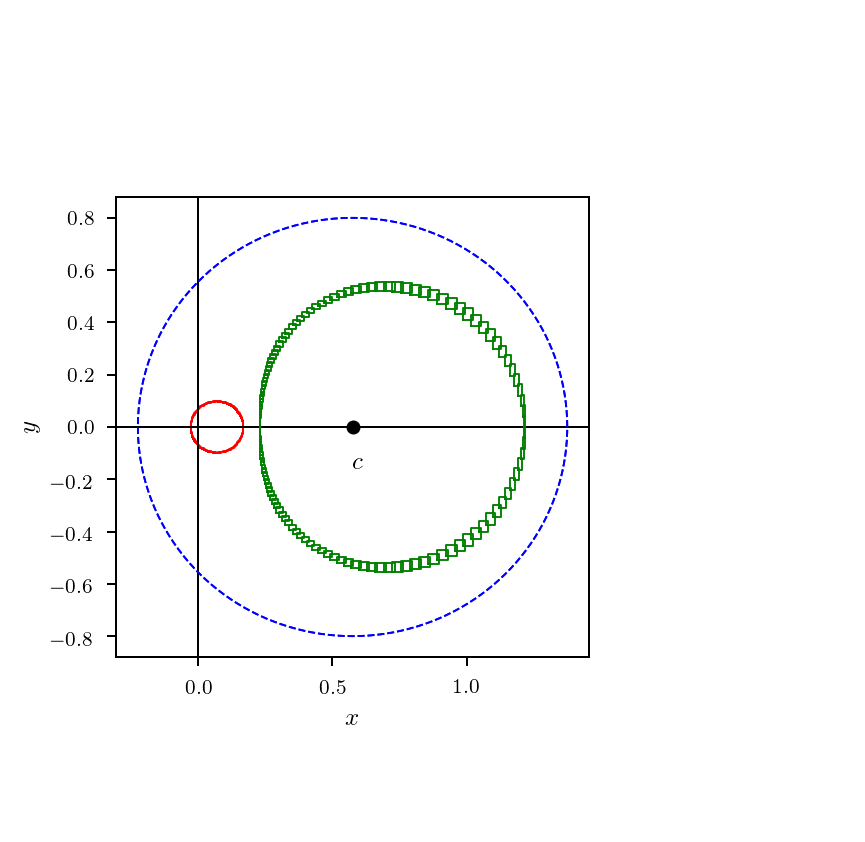

In [11]:
# complex domain extension; compute sets of covering rectangles
Omega = F1.dom
c, r = Omega.c, Omega.r
z_vals = list(cover_circle(c, r, 32, eps=2**-10))
a = F1(1)
alpha = Interval(1)/a
za2 = [z*a**d for z in z_vals]
gza2 = [F1(z) for z in za2]
qgza2 = [Q(z) for z in gza2]
gqgza2 = [F1(z) for z in qgza2]
alphagqgza2 = [z*alpha for z in gqgza2]
a2alphagqgza2 = [z*a**d for z in alphagqgza2]

# complex domain extension; produce diagrams
if make_figures:
    init_plotting(plt)
    plt.figure(figsize=set_size('prl', ratio=1))
    for k, w_vals in enumerate([za2, qgza2]):
        plt.axhline(0, color='k')
        plt.axvline(0, color='k')
        theta = np.linspace(0, np.pi*2, 501)
        fc, fr = float(c), float(r)
        plt.plot(fc+np.cos(theta)*fr, np.sin(theta)*fr, color='b', linestyle='--')
        x, y = rectangles_coords(w_vals)
        plt.plot(x, y, color=['r', 'g', 'b', 'c'][k])
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.plot([c], [0], linewidth=0, marker='o', color='k')
    plt.annotate(r'$\partial\Omega$', (2.3, 1.5))
    plt.annotate(r'$c$', (c, RR(-0.2)*r))
    plt.annotate(r'$\Gamma_1$', (-0.6, 0.2))
    plt.annotate(r'$\Gamma_2$', (1, -1.5))
    plt.savefig(f'fig/{prefix}_de_{k}.pdf')

# complex domain extension; verify results
all_okay = True
for w_vals in za2, qgza2:
    for w in w_vals:
        z = w - c
        okay = z.re**2 + z.im**2 < Interval(r)**2
        all_okay = all_okay and okay
#print(f'Complex domain extension: {all_okay}')
    
assert all_okay

#### Consequences of domain extension

We note that in general the spectral properties of arbitrarily-high degree truncations of a linear operator need not bear very much resemblance to those of the operator itself.

In addition to ensuring at $\mathbb{T}$ is well defined, verifying the domain extension conditions for a chosen domain and ball around an approximate fixed point ensures that the derivative $D\mathbb{T}(G)$, exists (in fact, it follows that $\mathbb{T}$ is $C^{\infty}$) and is a compact operator.  See, for example, [Krasnosel’skii, 1972, \S 18].  This means that $0$ is in the spectrum, that all other elements of the spectrum are eigenvalues of finite multiplicity, and that for any other linear operator $L$ such that $\|L-D\mathbb{T}(G)\|\to 0$, the spectrum of $L$ converges to that of $D\mathbb{T}(G)$ (except for $0$).  In particular, with increasing truncation degree, the spectra of finite-rank approximations to $D\mathbb{T}(G)$ converge (with the exception of $0$) to that of $D\mathbb{T}(G)$ itself.

## Bounds (in function space) for the existence proof

### Newton's method for fixed points

The operator $\mathbb{T}$ is not contractive near the desired fixed point and thus direct iteration of $\mathbb{T}$ is not useful.  Following Lanford and others, we utilise the circle of ideas around Newton's method in order to overcome this problem.  We note first that the fixed points of $\mathbb{T}$ are exactly the zeros of the operator defined by
$$
\mathbb{F} = \mathbb{T}-\mathbb{I}.
$$
Newton's method for zeros of $\mathbb{F}$ may be written as
\begin{align}
\mathcal{N}: G
&\mapsto G - [D\mathbb{F}(G)]^{-1}[\mathbb{F}(G)]\\
&= G - [D\mathbb{T}(G)-\mathbb{I}]^{-1}[\mathbb{T}(G)-G].
\end{align}
In the above, $D$ represents Frechet differentiation.

### Contractivity

We seek to use the Contraction Mapping Theorem to establish the existence of a fixed point for an operator that shares the same fixed points as $\mathbb{T}$.

In particular, we seek to prove that Newton's method for fixed points is a contraction on a suitably-chosen ball around an approximate fixed point $G_0$ of $\mathbb{T}$.  By appealing to the Mean Value Theorem, the contractivity of $\mathcal{N}$ may be bounded by examining the derivative $D\mathcal{N}$.  However, note that $D\mathcal{N}$ involves the second (Frechet) derivative of $\mathbb{T}$ and this is inconvenient to bound in practice.

### Modified Newton method

Instead, consider the modified Newton method defined by
$$
\Phi:G \mapsto G - \Lambda[\mathbb{T}(G)-G],
$$
for a fixed linear operator $\Lambda$.  Note that, for a suitable (nondegenerate) choice of $\Lambda$, this method has the same fixed points as $\mathbb{T}$.

We note that $\mathcal{A}$ is isomorphic to the direct sum
$$
\mathcal{A}=\mathbb{R}^{N+1}\oplus\ell_1,
$$
and choose $\Lambda$ to be a fixed linear operator that approximates $[D\mathbb{T}(G)-\mathbb{I}]^{-1}$ in the sense that
$$
\Lambda = [\Delta-\mathbb{I}]^{-1},
$$
where $\Delta\simeq D\mathbb{T}(G_0)$ acts on the low-order part of the space (isomorphic to $\mathbb{R}^{N+1}$) as a real $(N+1)\times(N+1)$ matrix (and is zero on the high-order part) and, thus, the action of $\Lambda$ on the high-order part of the space is given by $-\mathbb{I}$.

In [12]:
# matrix used to construct the linear operator in the approximate newton method
Lambda_elts = import_matrix('dat/' + prefix + '_lambda.dat')
Lambda_elts = [row[:trunc_degree+1] for row in Lambda_elts[:trunc_degree+1]]
assert len(Lambda_elts) == len(Lambda_elts[0]) == trunc_degree+1

# construct the real interval matrix
Lambda = RMatrix(Lambda_elts)

# apply the newton method and see how far F0 moves; defines epsilon for the proof
def Phi(F):
    return F - Lambda * (T_even(F) - F)

### Bound #2: Distance moved by approximate fixed point

We prove that
$$
\|\Phi(G_0)-G_0\|_1<\varepsilon,
$$
for a machine-representable number $\varepsilon>0$,
by rigorous computation on the function ball $F_0\ni G_0$.  In other words, we show that the approximate fixed point doesn't move too far under the modified Newton method.

In [13]:
%%time

Phi_F0 = Phi(F0)
residue_Phi = Phi_F0 - F0

CPU times: user 995 ms, sys: 3.7 ms, total: 999 ms
Wall time: 998 ms


From the above we may take as $\varepsilon$ the (upper bound on the) interval $\|\Phi(F_0)-F_0\|$ given by:

In [14]:
epsilon = abs(residue_Phi)
print('epsilon\n= ||Phi(F0)-F0||_1\n=', epsilon)
assert epsilon < rho

epsilon
= ||Phi(F0)-F0||_1
= [+0.00000000000000E+00, +1.58431379745242E-21]


### Derivative of modified Newton method

The Frechet derivative of the modified Newton operator is given by
$$
D\Phi(G) = I - \Lambda[D\mathbb{T}(G)-I].
$$
Thus
$$
D\Phi(G): \delta G \mapsto \delta G - \Lambda[D\mathbb{T}(G)(\delta G)-\delta G].
$$
Note that considering $\ell_1=\mathbb{R}^{N+1}\oplus\ell_1$ and writing $\delta G=\delta G_P+\delta G_H$, on the high-order part of the space this gives
\begin{align}
D\Phi(G): \delta G_H
&\mapsto \delta G_H + [D\mathbb{T}(G)(\delta G_H)-\delta G_H]\nonumber\\
&= D\mathbb{T}(G)(\delta G_H).
\end{align}

Note: it is vital to use the latter expression for the action on the high-order part of the space when implementing the operator using function ball operations.  The presence of terms $\delta G$ and $-\delta G$ in the former expression leads to a variant of the dependency problem, well-known from the study of interval arithmetic.  To illustrate, consider that a naive attempt to bound the expression $x-x$ in the case where $x$ is bounded within an interval $[a,b]$ would be to compute the interval $[a,b]-[a,b]$.  Note, however, that the result of this interval arithmetic operation is the interval $[a-b,b-a]\neq[0,0]$ in general.  This issue arises because interval subtraction is an operation between sets defined by
$$
X\ominus Y = \{x-y:\ x\in X,y\in Y\},
$$
in which $x,y$ are allowed to vary independently within $X,Y$.  Thus, dependency between the operands in the expression $x-x$ is not reflected in the expression $[a,b]-[a,b]$ and thus not in the corresponding computable operation $[a,b]\boxminus[a,b]$.  The analogous difficulty in implementing the above expression for the action of $D\Phi(G)$ using function ball arithmetic, in particular when the only information available regarding high-order terms that that their norm is bounded within $[0,v_H]$ and that their contribution to the overall norm lies within $[-v_H,v_H]$, is avoided by using the simplified expression $D\mathbb{T}(G)$ on the high-order part of the space.

The Frechet derivative of the operator $\mathbb{T}$, appearing in the above expressions, is given by the following

\begin{align}
D\mathbb{T}(G):\delta G(X)\mapsto
&-a^{-2}\delta a \cdot G(Q(G(a^dX)))\nonumber\\
&\quad{}+ a^{-1}\cdot\delta G(Q(G(a^dX)))\nonumber\\
&\qquad{}+ a^{-1}\cdot G'(Q(G(a^dX)))\cdot Q'(G(a^dX))\cdot\delta G(a^dX)\nonumber\\
&\qquad\quad{}+ a^{-1}\cdot G'(Q(G(a^dX)))\cdot Q'(G(a^dX))\cdot G'(a^dX)\cdot Q'(a)\delta a X,
\end{align}
where $a:=G(1)$ implies that $\delta a=\delta G(1)$.

### Bound #3: Contractivity of quasi-Newton operator

We bound
$$
\|D\Phi(G)\|\le\kappa<1,
$$
for all $G\in F_1$, i.e., for all $G$ with $\|G-G_0\|_1\le\rho$.  Identifying the tangent space of $\mathcal{A}_\Omega$ with $\mathcal{A}_\Omega$, we do this by bounding $D\Phi(G)(e_k)$ for all basis vectors
$$
e_k(x)=\left(\frac{x-c}{r}\right)^k.
$$
Specifically, for $0\le k\le N$, we bound each $e_k$ (tightly) by a function ball
$$
E_k := \mathcal{A}_\Omega([0,0],\ldots,[1,1],\ldots,[0,0];0;0).
$$
This leaves infinitely-many basis vectors $e_k$ for $k>N$.  We bound all of these (loosely) by the single function ball denoted
$$
E_{N+1} \equiv E_H := \mathcal{A}_\Omega([0,0],\ldots,[0,0];1;0),
$$
with high-order bound $v_H=1$.

We note that it is critical, in order for the proof to succeed, that the norms
$$
\|D\Phi(G)(e_k)\|_1,
$$
decay quickly-enough with increasing $k$, otherwise the bounds that we can compute on $\|D\Phi(F_1)(E_{N+1})\|_1$ will be too large.

In this way, we are able to find $\kappa$ such that
$$
\|D\Phi(G)(e_k)\|_1\le\kappa<1,
$$
for all $G\in F_1$ and all $k\ge 0$.  Accordingly, the *maximum column sum norm* $\|D\Phi(G)\|$, of $D\Phi(G)$ itself, is then bounded by $\kappa$.  [We note that computation of the $D\Phi(G)(e_k)$ can be performed efficiently in parallel.]

Appealing to the Mean Value Theorem, and noting convexity of the function balls, this establishes the contractivity of $\Phi$ on $F_1$: take any $X,Y\in F_1$, then there exists $\eta=\lambda Y + (1-\lambda)X\in F_1$ for some $\lambda\in[0,1]$ such that
\begin{align}
\|\Phi(X)-\Phi(Y)\|
&=\|D\Phi(\eta)\|\cdot\|X-Y\|\\
&\le\sup_{F\in F_1}{\|D\Phi(F)\|}\cdot\|X-Y\|\\
&\le\kappa\|X-Y\|.
\end{align}

In [15]:
%%time

# next, we will bound the derivative of our newton operator Phi on F1
# for efficiency, we first compute all subexpressions in the frechet
# derivative DT(G)(deltaG) that are independent of deltaG.

DTG = DT(F1)

CPU times: user 2.48 s, sys: 0 ns, total: 2.48 s
Wall time: 2.48 s


In [16]:
# the following computation treats one basis element, element number k
# we will perform many of these in parallel

def bound_derivative_of_newton(k, dependency=True, DTG=DTG):

    # define basis element
    E_k = F1.basis_element(k)
    
    # check basic property
    if k < trunc_degree+1:
        assert Interval(1) in abs(E_k), f'{abs(E_k)}'
    else:
        assert Interval(0, 1) in abs(E_k), f'{abs(E_k)}'

    # evalulate and bound Frechet derivative of T
    deltaT_k = DTG(E_k)
    norm_deltaT_k = abs(deltaT_k)

    # evalulate and bound derivative of newton operator
    # the default behaviour of rmatrix on the high-order part is +/-I
    if k > trunc_degree and dependency:
        DPhi_F1_E_k = - Lambda * deltaT_k
    else:
        DPhi_F1_E_k = E_k - Lambda * (deltaT_k - E_k)

    # report on the cruicial norms
    norm_DPhi_F1_E_k = abs(DPhi_F1_E_k)

    # return the norm
    return deltaT_k, norm_deltaT_k, DPhi_F1_E_k, norm_DPhi_F1_E_k

In [17]:
%%time

# we use the pathos framework to run the function in parallel; install it via:
# conda install -c conda-forge pathos
k_vals = list(range(trunc_degree+2))
if parallel:
    import pathos.multiprocessing
    from pathos.multiprocessing import ProcessingPool as Pool
    num_processors = pathos.multiprocessing.cpu_count()
    with Pool(num_processors) as pool:
        DTG_ks, norm_DTG_ks, DPhi_ks, norm_DPhi_ks = list(zip(*pool.map(bound_derivative_of_newton, k_vals)))
else:
    DTG_ks, norm_DTG_ks, DPhi_ks, norm_DPhi_ks = list(zip(*map(bound_derivative_of_newton, k_vals)))

CPU times: user 181 ms, sys: 24.2 ms, total: 205 ms
Wall time: 5.92 s


The following table shows bounds on the derivative of the operator $\mathbb{T}$ itself, $\|D\mathbb{T}(G)(e_k)\|_1$ valid for all $G\in F_1$.  [These will prove useful later, in bounding the spectrum of $D\mathbb{T}(G)$.]  We observe that the norm decays approximately at a geometric rate with increasing degree (noting that the final bound is for $\|D\mathbb{T}(G)(E_{N+1})\|_1$ where $E_{N+1}$ is the convex hull that contains all $e_k$ for $k\ge N+1$).

In [18]:
print('||DT(F_1)(E_k)||_1:')
for k, norm in enumerate(norm_DTG_ks):
    print(f'{k:0>3}: {norm}')

||DT(F_1)(E_k)||_1:
000: [+1.88268405957669E+1, +1.88268405957670E+1]
001: [+1.04059316618501E+1, +1.04059316618502E+1]
002: [+7.84995293700679E+0, +7.84995293700680E+0]
003: [+4.33898473574701E+0, +4.33898473574702E+0]
004: [+3.58294878995776E+0, +3.58294878995777E+0]
005: [+2.84343537926175E+0, +2.84343537926176E+0]
006: [+2.06907684379669E+0, +2.06907684379670E+0]
007: [+1.63966102609243E+0, +1.63966102609244E+0]
008: [+1.19756130781775E+0, +1.19756130781776E+0]
009: [+9.14828120195283E-1, +9.14828120195284E-1]
010: [+6.97214746328223E-1, +6.97214746328224E-1]
011: [+5.32750642367224E-1, +5.32750642367225E-1]
012: [+4.03921140422645E-1, +4.03921140422646E-1]
013: [+3.09320398422399E-1, +3.09320398422400E-1]
014: [+2.37356587669743E-1, +2.37356587669744E-1]
015: [+1.81862708279064E-1, +1.81862708279065E-1]
016: [+1.39392548105749E-1, +1.39392548105764E-1]
017: [+1.07487052146867E-1, +1.07487052147029E-1]
018: [+8.28067231668177E-2, +8.28067231739250E-2]
019: [+6.37436967567020E-2, +6

The following table shows bounds on the derivative of the adapted Newton method, $\|D\Phi(G)(e_k)\|_1$, valid for all $G\in F_1$.

In [19]:
print('||DPhi(F_1)(E_k)||_1:')
for k, norm in enumerate(norm_DPhi_ks):
    print(f'{k:0>3}: {norm}')

||DPhi(F_1)(E_k)||_1:
000: [+0.00000000000000E+00, +2.11190586574761E-16]
001: [+0.00000000000000E+00, +1.29931112976610E-16]
002: [+0.00000000000000E+00, +8.42469254959052E-17]
003: [+0.00000000000000E+00, +5.76468559682917E-17]
004: [+0.00000000000000E+00, +4.13262774691011E-17]
005: [+0.00000000000000E+00, +3.09377134591248E-17]
006: [+0.00000000000000E+00, +2.39464816197319E-17]
007: [+0.00000000000000E+00, +1.89801306804310E-17]
008: [+0.00000000000000E+00, +1.52903331670406E-17]
009: [+0.00000000000000E+00, +1.24557788083193E-17]
010: [+0.00000000000000E+00, +1.02465290948898E-17]
011: [+0.00000000000000E+00, +8.46901276400844E-18]
012: [+0.00000000000000E+00, +7.02211753438776E-18]
013: [+0.00000000000000E+00, +6.05486215053879E-18]
014: [+0.00000000000000E+00, +1.70536341278553E-17]
015: [+0.00000000000000E+00, +1.03262909035975E-16]
016: [+0.00000000000000E+00, +1.38809016352429E-14]
017: [+0.00000000000000E+00, +1.60231647072980E-13]
018: [+0.00000000000000E+00, +7.1071619797

In [20]:
# we require the maximum column sum norm,
# i.e., the maximum of all of these norms
# care should be taken here!
# be sure to use the convex hull rather than the max
# because intervals are not totally ordered
maximum_norm = Interval.hull(norm_DPhi_ks)
kappa = maximum_norm
print(f'kappa\n=', kappa)

kappa
= [+0.00000000000000E+00, +4.78714283542048E-3]


### Application of the contraction mapping theorem

Together, these bounds are used to establish the crucial inequality
\begin{align}
%\varepsilon + \kappa\rho &< \rho\\
%\Leftrightarrow
\varepsilon &< \rho(1-\kappa),
\end{align}
which, together with contractivity established above, proves that the ball of functions $F_1\subset\mathcal{A}_\Omega$ is mapped into itself contractively by $\Phi$.

In [21]:
# report the data we collected
print(f'epsilon < rho(1-kappa)')
print(f' <=> {epsilon}')
print(f'   < {rho*(1-kappa)}')
print(f' <=> {epsilon < rho*(1-kappa)}')

epsilon < rho(1-kappa)
 <=> [+0.00000000000000E+00, +1.58431379745242E-21]
   < [+9.95212857164579E-21, +1.00000000000000E-20]
 <=> True


In [22]:
# determine if the proof has succeeded
assert epsilon < rho*(1-kappa)

Hence, by the CMT, there exists a (locally) unique fixed point $G_{*}$ of $\Phi$ in the function ball $F_1$.  Since fixed points of $\Phi$ are exactly those of $\mathbb{T}$, this concludes the proof.

### Bounds on the universal function

In [23]:
# universal function in the conventional coordinates
def g(x):
    X = Q(x)
    return F1(X)

Figure: Rigorous covering of the even representation, $G$


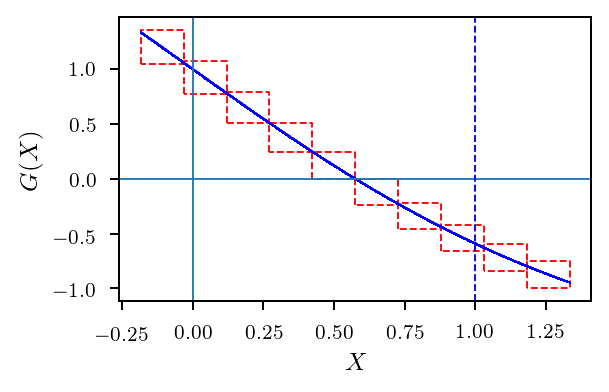

Figure: Rigorous covering of the universal function, $g$


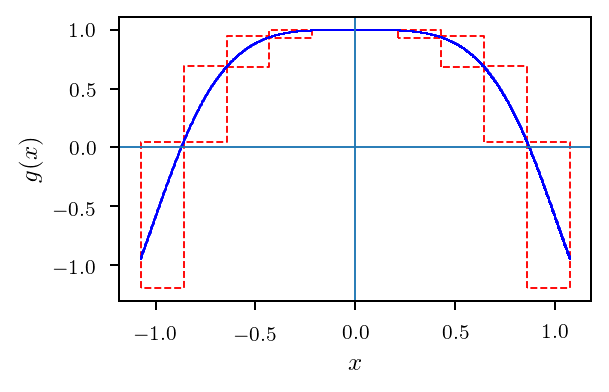

In [24]:
if make_figures:
    buffer = RR('0.95')
    init_plotting(plt)
    plt.figure(figsize=set_size('prl'))
    plt.plot(*rectangles_coords(cover_graph(F1, c-r*buffer, c+r*buffer, 10)), color='r', linestyle='--')
    plt.plot(*rectangles_coords(cover_graph(F1, c-r*buffer, c+r*buffer, 1000)), color='b')
    plt.axhline(0)
    plt.axvline(0)
    plt.axvline(1, linestyle='--', color='b')
    plt.xlabel('$X$')
    plt.ylabel('$G(X)$')
    plt.title('Rigorous covering of the even representation, $G$')
    savefig(plt, 'fig/feig_G_small.pdf')
    plt.show()

    xy0 = rectangles_coords(cover_graph(g, -(c+r*buffer)**RR(0.25), (c+r*buffer)**RR(0.25), 10)) #-5, 10
    xy1 = rectangles_coords(cover_graph(g, -(c+r*buffer)**RR(0.25), (c+r*buffer)**RR(0.25), 1000)) #-5, 10

    plt.figure(figsize=set_size('prl'))
    plt.plot(*xy0, color='r', linestyle='--')
    plt.plot(*xy1, color='b')
    plt.axhline(0)
    plt.axvline(0)
    plt.xlabel('$x$')
    plt.ylabel('$g(x)$')
    plt.title('Rigorous covering of the universal function, $g$')
    savefig(plt, 'fig/feig_g_small.pdf')
    plt.show()

In order to bound the function outside of the domain of the function ball $F_1$, we may use the fixed-point equation:
$$
g(x) = a^{-1}g(g(ax)),
$$
recursively.

In [25]:
def G_full(X):
    if -r <= X-c <= r:
        return F1(X)
    else:
        return alpha*G_full(Q(G_full(a**d*X)))

def g_full(x):
    return G_full(Q(x))

Figure: Rigorous covering of the even representation, $G$


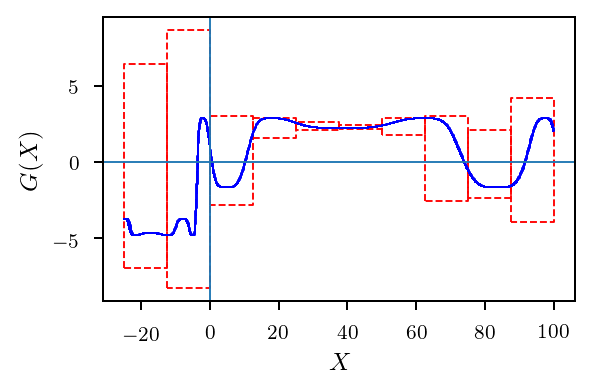

Figure: Rigorous covering of the universal function, $g$


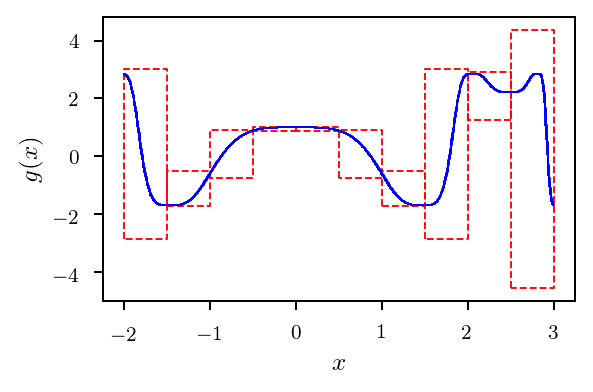

In [26]:
if make_figures:
    init_plotting(plt)
    plt.figure(figsize=set_size('prl'))
    plt.plot(*rectangles_coords(cover_graph(G_full, -25, 100, 10)), color='r', linestyle='--')
    plt.plot(*rectangles_coords(cover_graph(G_full, -25, 100, 1000)), color='b')
    plt.axhline(0)
    plt.axvline(0)
    plt.xlabel('$X$')
    plt.ylabel('$G(X)$')
    plt.title('Rigorous covering of the even representation, $G$')
    savefig(plt, 'fig/feig_G_large.pdf')
    plt.show()

    xy0 = rectangles_coords(cover_graph(g_full, -2, 3, 10)) #-5, 10
    xy1 = rectangles_coords(cover_graph(g_full, -2, 3, 1000)) #-5, 10

    plt.figure(figsize=set_size('prl'))
    plt.plot(*xy0, color='r', linestyle='--')
    plt.plot(*xy1, color='b')
    #plt.axhline(0)
    #plt.axvline(0)
    plt.xlabel('$x$')
    plt.ylabel('$g(x)$')
    plt.title('Rigorous covering of the universal function, $g$')
    if False:
        ax = plt.gca().inset_axes([0.075, 0.075, 0.5, 0.4])
        ax.plot(*xy0, color='r', linestyle='--')
        ax.plot(*xy1, color='b')
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_xlim(0.85, 1.15)
        ax.set_ylim(-0.6, -0.2)
    savefig(plt, 'fig/feig_g_large.pdf')
    plt.show()

## Spectral theory

The purpose of this section is to obtain rigorous bounds on the spectrum of $D\mathbb{T}$ at the fixed point $G$.  The analyticity improving property, established in the section on *domain extension* implies that $D\mathbb{T}(G)$ is a compact operator.  In turn, this means that the spectrum of $D\mathbb{T}(G)$ consists of a countable set of isolated eigenvalues of finite multiplicity, together with the point $0$ (at which these eigenvalues may accumulate).

### Change of basis

At this point, we make a change of basis for the polynomial part of $D\mathbb{T}(G)$ in order to bring it into a form closer to diagonal, from which the largest magnitude eigenvalues can more easily be bounded.
To this end, we choose a linear operator $\mathcal{P}$, whose action on the high-order part of the space is the identity and which acts on the polynomial part as an $(N+1)\times (N+1)$ real matrix $A$.
We form the columns of this matrix using approximate (numerical) eigenvectors of $D\mathbb{T}(G)$. 

Computationally, we represent the polynomial part of the operator by a real interval matrix with degenerate elements.
Note that we can bound the inverse $\mathcal{P}^{-1}$ of this operator by performing interval Gauss elimination on $A$.

\begin{equation}
\mathcal{P}^{-1}
=
\left(\begin{array}{c|c}
A^{-1} & 0\\
\hline
0 & I
\end{array}\right).
\end{equation}

We thus bound a linear operator $\mathcal{P}$ and its inverse $\mathcal{P}^{-1}$ and hence may bound the composition
$$
\mathcal{P}^{-1}D\mathbb{T}(G)\mathcal{P} =: E,
$$
for all $G\in F_1$ by using function ball operations to bound the expression for the Frechet derivative evaluated over the function ball $F_1$ on all basis elements, $\mathcal{P}e_k$.  Note that the linear operator $E$ represents $D\mathbb{T}(G)$ under a change of basis.

In [27]:
# suppressed; not required
if trunc_degree <= 20:
    N = trunc_degree
    DTG_approx_mat = np.array([[float(DTG_ks[k].func.P[j].lo) for k in range(N+1)] for j in range(N+1)])
    eigval_approx, eigvec_as_cols_approx = np.linalg.eig(DTG_approx_mat)
    P_mat_approx = eigvec_as_cols_approx
    P_mat_elts = [[Interval(RR(elt)) for elt in row] for row in P_mat_approx]
    P_mat = RMatrix(P_mat_elts)
    P_inv_mat = P_mat.inv()
    m, n = P_mat.shape()
    assert m == n
    DTG_PP_mat = RMatrix([[DTG_ks[k].func.P[j] for k in range(n)] for j in range(n)])
    E_semirig = P_inv_mat * DTG_PP_mat * P_mat

In [28]:
# suppressed; not required
if trunc_degree <= 20:

    def bound_similarity_transformed_DTG(k, P_mat=P_mat, P_inv_mat=P_inv_mat):
        # passing the globals P_mat and P_inv_mat as default args
        # seems to avoid problems with pathos multiprocessing and
        # dill pickling this function.
        one = Interval(1)
        E_k = F1.basis_element(k)
        P_k = P_mat * E_k
        DTG_P_k = DT_even(F1, P_k)
        Pinv_DTG_P_k = P_inv_mat * DTG_P_k  
        return P_k, DTG_P_k, Pinv_DTG_P_k

    if parallel:
        with Pool(num_processors-1) as pool:
            P_ks, DTG_P_ks, Pinv_DTG_P_ks = list(zip(*pool.map(bound_similarity_transformed_DTG, k_vals)))
    else:
        P_ks, DTG_P_ks, Pinv_DTG_P_ks = list(zip(*map(bound_similarity_transformed_DTG, k_vals)))

### Contracted vectors and contracted matrices

The key tool in dealing with the spectrum is the concept of a *contracted matrix*.

Firstly, we establish some notation.  We choose to present the following in a slightly more general context than needed.  Let $X$ be a real Banach space, let $m\le N$ be a positive integer, let $P$ be a continuous projection operator on $X$ of $m$-dimensional range and put $H = I - P$.  We choose $m$ to be at least the number of specific eigenvalues that we wish to isolate.  In this case, it is useful to choose $m\ge 2$ since $D\mathbb{T}(G)$ is hyperbolic with expanding directions corresponding to eigenvalues $\alpha^d$ and $\delta$, with all other eigenvalues having $|\lambda|\le r<1$.  We note that it may be necessary to choose $m$ larger than this desired number in order to achieve tighter bounds; in particular, there are tradeoffs with the truncation degree $N$, the function ball radius $\rho$, the accuracy of the approximate fixed point, and so on.

We choose a basis
$\{e_1, e_2,\ldots, e_m\}$ of $PX$. The equation 
$$
Px = \sum_{i = 1}^m \phi_i(x) e_i,
$$
defines the (coordinate) functionals $\phi_i$.

In this context, $(m+1)$-dimensional interval
vectors $u = (u_1,\ldots,u_{m+1})$ will be called *contracted vectors*.  The $(m+1)-th$ element should be thought of as bounding infinitely-many 'high-order' elements.

The key idea is the following: we can define a concept of containment of $x\in X$ in a contracted vector $u$ and of a linear operator in a contracted matrix, with the useful property that if contracted matrix $C$ contains linear operator $T$ and $\lambda$ is an interval containing a real eigenvalue of $T$, then the interval $\det(C-\lambda I)$ contains zero.

Definition: Let $u$ be a contracted vector and $x\in X$.  We say that $u$ contains (or bounds) $x$ (with respect to the chosen decomposition $X=PX\oplus HX$ and the chosen basis of $PX$), represented symbolically by $x\in u$, if
$$
\phi_k(x)\in u_k,\quad 1\le k\le m,
$$
and
$$
\psi(Hx)\in u_{m+1}\quad\forall\psi\in(HX)^{*},\|\psi\|\le 1.
$$

In particular, if $x\in X$ and intervals $u_k$ contain the coordinates $\phi_k(x)$, then $x$ is bounded by the vector of intervals
\begin{equation}
u = (u_1,\ldots,u_m,[-\|Hx\|,+\|Hx\|]).
\end{equation}

The following useful properties then enable us to bound operations on $X$ by those on contracted vectors:
\begin{align}
x\in u,y\in v &\Rightarrow x+y\in u+v,\\
x\in u,\lambda\in\ell &\Rightarrow \lambda x\in\ell u.
\end{align}

In a similar way, we may contain a bounded linear operator in a contracted matrix.

Definition: If $L$ is a bounded linear operator on $X$ and $C=(c_{jk})$ is an $(m+1)\times(m+1)$ interval matrix, then we say that $C$ contains (or bounds) $L$, represented symbolically by $L\in C$, with respect to the decomposition $X=PX\oplus HX$ and the chosen basis for $PX$ if the following hold for $1\le j,k\le m$, for all $z\in HX$ with $\|z\|\le 1$, and for all $\psi\in(HX)^{*}$ with $\|\psi\|\le 1$:

\begin{align}
\phi_j(Le_k) &\in c_{jk},\\
\phi_j(Lz) &\in c_{j(m+1)},\\
\psi(HLe_k) &\in c_{(m+1)k},\\
\psi(HLz) &\in c_{(m+1)(m+1)}.
\end{align}

In particular, let $L$ be a bounded linear operator on $X$, with
\begin{align}
a_{jk}&:=\phi_j(Le_k),\\
\theta_j &:= \phi_jL | HX,\\
t_k &:= HLe_k,\\
\Theta &:= HL | HX,
\end{align}
so that $\theta_j\in(HX)^{*}$, $t_k\in HX$, and $\Theta\in L(HX,HX)$, and we may therefore represent $L$ in block form, with respect to the decomposition $X=PX\oplus HX$ and the chosen basis $(e_k)$ for $PX$, by
\begin{equation}
L=\left(\begin{array}{ccc|c}
a_{11} & \cdots & a_{1m} & \theta_1\\
\vdots & \ddots & \vdots & \vdots\\
a_{m1} & \cdots & a_{mm} & \theta_m\\
\hline
t_1 & \cdots & t_m & \Theta
\end{array}\right).
\end{equation}
If the 'matrix elements' $a_{jk}$ are contained in the intervals $c_{jk}$,
then $L$ is contained in the interval matrix $C$ given by:

\begin{equation}
C=\left(\begin{array}{ccc|c}
c_{11} & \cdots & c_{1m} & [-\|\theta_1\|,+\|\theta_1\|]\\
\vdots & \ddots & \vdots & \vdots\\
c_{m1} & \cdots & c_{mm} & [-\|\theta_m\|,+\|\theta_m\|]\\
\hline
[-\|t_1\|,+\|t_1\|] & \cdots & [-\|t_m\|,+\|t_m\|] & [-\|\Theta\|,+\|\Theta\|]
\end{array}\right)
\end{equation}

Again, the utility of the above definition lies in properties that allow us to bound the action of $L$ on elements of $X$ by the action of a contracted matrix on a contracted vector: we have, in particular,
\begin{align}
L\in C,x\in u\Rightarrow Lx\in Cu,
\end{align}
in which the operation on the right-hand side of the final containment is simply (interval) matrix multiplication.

The above notion of containment preserves enough of the linear structure to yield the following result: we note that if $L$ is a linear operator and $C$ a contracted matrix with $L\in C$, and $\lambda\in\sigma(L)$ is a real eigenvalue of $L$, then the interval $\det(C-\lambda I)$ contains $0$.  Trivially, note also that if $\lambda$ is itself an interval containing an eigenvalue of $L$ then $\det(C-\lambda I)\ni 0$.

### Bounding the spectrum

We use the above ideas to bound the spectrum of $D\mathbb{T}(G)$.  We form a contracted matrix $C$ that contains $\mathcal{P}^{-1}D\mathbb{T}(G)\mathcal{P}$, i.e., $D\mathbb{T}(G)$ under a change of basis that moves it closer to diagonal, for all $G\in F_1$.  We choose an interval in $\mathbb{R}$ in which to search for eigenvalues of $D\mathbb{T}(G)$.  This interval may be chosen by noting that the spectral radius of $D\mathbb{T}(G)$ is bounded by the operator norm which is in turn bounded by the maximum column sum norm.  A bound on this final norm was produced as a by-product of the existence proof.

We then sub-divide this interval into small sub-intervals and evaluate the expression $\det(C-\lambda I)$ on each subinterval $\lambda$ using Gauss elimination to row echelon form using row operations with interval arithmetic.  There are two possible outcomes: either (i) the result is an interval bounded away from zero, or (ii) the elimination either fails as a suitable pivot interval cannot be determined or results in an interval containing zero.  In case (i), the expression $\det(C-\lambda I)$ has been bounded strictly away from zero and thus the interval $\lambda$ does not contain an eigenvalue.  Case (ii) is inconclusive by itself and we must reason about the pattern of sign changes between any nearest-neighbouring subintervals that fall under case (i) in order to determine whether a zero exists.

[We may also move to the realification of the space $X$ by taking $\{e_k\}\cup\{ie_k\}$, where here $i$ represents the imaginary unit, as a basis for $(\ell_1\oplus\ell_1)^2$ and working with rectangle arithmetic.  Doing this yields the corresponding result that if a rectangle $\lambda\subset\mathbb{C}$ contains a complex eigenvalue of the linear operator $L\in C$, then the rectangle $\det(C-\lambda I)$ contains zero.  In this way, one can deal with the full spectrum of bounded linear operators on a real Banach space $X$.]

In [29]:
def high_order_parts_are_balanced(A):
    assert isinstance(A, RMatrix)
    m, n = A.shape()
    assert m == n
    for j in range(n):
        if A[j,-1].hi != -A[j,-1].lo:
            return False
    for k in range(n):
        if A[-1,k].hi != -A[-1,k].lo:
            return False
    return True

In [30]:
def balanced_matrix_off_diagonals(A):
    assert isinstance(A, RMatrix)
    m, n = A.shape()
    assert m == n
    B = RMatrix.zeros((n, n))
    for j in range(n):
        for k in range(n):
            if j == k:
                B[j, k] = A[j, k]
            else:
                x = A[j, k]
                B[j, k] = Interval.hull([x, -x])
    return B

In [31]:
def off_diagonals_are_balanced(A):
    assert isinstance(A, RMatrix)
    m, n = A.shape()
    assert m == n
    for j in range(n):
        for k in range(n):
            if j != k:
                if A[j, k].lo != -A[j, k].hi:
                    return False
    return True

In [32]:
# suppressed; not required
if trunc_degree <= 20:
    V_contracted = RMatrix.zeros((trunc_degree+2, trunc_degree+2))
    for j in range(trunc_degree+2):
        for k in range(trunc_degree+2):
            if j <= trunc_degree:
                V_contracted[j,k] = Pinv_DTG_P_ks[k].func.P[j]
            else:
                assert Pinv_DTG_P_ks[k].func.G.hi == 0
                h = Pinv_DTG_P_ks[k].func.H.hi
                V_contracted[j,k] = Interval(-h, h)

    assert high_order_parts_are_balanced(V_contracted)

    #V_balanced = balanced_matrix_off_diagonals(V_contracted)
    # balancing the off-diagonals, by expanding those intervals,
    # would be required for the perturbation argument of Mestel to
    # be used; we are not using that argument here.

    V_balanced = V_contracted

    assert high_order_parts_are_balanced(V_balanced)
    #assert off_diagonals_are_balanced(V_balanced)

In [33]:
# real-line version; use complex plane version
# if full spectral bounds are needed; not required.
def classify(I):
    try:
        d = RMatrix.det(V_balanced-RMatrix.eye(trunc_degree+2)*I)
        if d < 0:
            s = -1
        else:
            s = +1
    except ZeroDivisionError:
        s = 0
    return s

def refine(cover):
    new_cover = []
    for I, s in cover:
        if s != 0:
            new_cover.append((I, s))
        else:
            n = 10
            for k in range(n):
                c = (I.hi + I.lo)/2
                p0 = Interval(k)/Interval(n)
                q0 = Interval(1)-p0
                p1 = Interval(k+1)/Interval(n)
                q1 = Interval(1)-p1
                a = Interval(I.lo)*q0 + Interval(I.hi)*p0
                b = Interval(I.lo)*q1 + Interval(I.hi)*p1
                x = Interval.hull([a, b])
                xs = classify(x)
                new_cover.append((x, xs))
    return new_cover

def group(cover):
    prev = None
    for I, s in cover:
        if prev is None:
            prev = I, s
        else:
            Iprev, sprev = prev
            if sprev == s and I.lo == Iprev.hi:
                prev = Interval.hull([Iprev, I]), s
            else:
                yield prev
                prev = I, s
    if prev is not None:
        yield prev

For the case of truncation degree 20, for example, the following intervals were identified as containing eigenvalues with $|\lambda|>1$:

In [34]:
# cached previous result as we don't run technique for N>20 here
# or for the current results
print(Interval(RR('+7.28468621363200E+0'), RR('+7.28468622361600E+0')))
print(Interval(RR('+8.16315831577600E+0'), RR('+8.16315832576000E+0')))

[+7.28468621363200E+0, +7.28468622361600E+0]
[+8.16315831577600E+0, +8.16315832576000E+0]


In [35]:
# suppressed; not required
if trunc_degree <= 20:
    cover = [(Interval(-100, RR('-0.16')), 0), (Interval(RR('0.16'), 100), 0)]
    for k in range(10):
        #print(len(cover), end=', ')
        cover = refine(cover)

    for I, s in group(cover):
        if s == 0:
            print(I)

    assert alpha**4 in list(group(cover))[-2][0]

These intervals bound Feigenbaum's $\delta$ and $\alpha^4$, respectively.  All other eigenvalues are bounded with $|\lambda|<0.256$.  We note the absence of odd powers of $\alpha$ in the spectrum is due to our formulation of the operator with the even representation.  We note also that the eigenvalue $\alpha^4$ is non-essential, being a coordinate change eigenvalue and that it has been shown elsewhere that the particular choice of $\alpha$ respecting the normalisation $g(0)=1$ only affects the spectrum up to non-essential eigenvalues.

Complex bounds: Our goal is to bound the spectrum of $V$, which is identical to that of $DT(G)$.

The idea now is to consider a one-parameter family of linear transformations $\mu\mapsto L_\mu$ with $\mu\in[0, 1]$ such that $L_0=D$, a diagonal operator consisting of $V$ with off-diagonal elements zeroed, and whose spectrum is therefore trivial to bound (in both eigenvalues and multiplicities), and $L_1=V$.

We cover circles $\Gamma_k$, surrounding candidate eigenvalues, with collections $R_k$ of rectangles in $\mathbb{C}$ and cover the interval $[0, 1]\ni \mu$ with overlapping subintervals, and hence bound the contracted matrix determinant
$$
\det(L_\mu-\lambda I),
$$
for all $\mu\in[0,1]$ and all $\lambda\in R_k$.  If this quantity remains bounded away from zero, then no eigenvalue can cross the circle $\Gamma_k$ and, since the determinant is continuous in the linear operator, we gain bounds on the spectrum of $V$ (both in location of eigenvalues and multiplicities) and hence $DT(G)$.

These bounds could be improved by taking a higher truncation degree, a smaller function ball $F_1$, and by increasing the contraction degree $m$.  However, it is arguably more effective to use a quasi-Newton operator for the corresponding eigenfunction problem to refine a suitable approximate eigenvalue-eigenfunction pair, and then to prove contractivity of a ball around the resulting pair, i.e., to apply the techniques used in the existence proof to this problem.

We do this below, and in the paper.

In the Julia version of the code, we work with rectangle arithmetic to bound the spectrum in the complex plane, rather than solely on the real line.

## Rigorous bounds on eigenfunctions

In [36]:
# coordinate functional, taking into account general term
def phi(V):
    return V.func.P[0] + Interval(-V.func.G.hi, +V.func.G.hi)

# error in eigenfunction with corresponding eigenvalue as its constant term
def F(V):
    return DTG(V) - V*phi(V)

# Frechet derivative of the error
def DF(V, delta_V):
    return DTG(delta_V) - (delta_V*phi(V) + V*phi(delta_V))

### The eigenproblem

We now aim to get rigorous bounds on eigenfunction-eigenvalue pairs $(V, \lambda)$: we need to solve the equation
\begin{align}
D\mathbb{T}(G)V &= \lambda V,
\end{align}
which we abbreviate to
\begin{align}
LV &= \lambda V.
\end{align}
For eigenfunctions we insist that $V\not\equiv 0$ and thus there is a minimum $k$ such that $\phi_k(V)\neq 0$, where $\phi_k$ denotes the $k$-th coordinate functional with respect to our chosen basis.  We may then encode the eigenvalue $\lambda$ within the eigenfunction $V$ by writing $\phi=\phi_k$ and
\begin{align}
(V, \lambda)\mapsto \lambda\frac{V}{\phi(V)},
\end{align}
and then solving the corresponding nonlinear problem given by 
\begin{align}
LV &= \phi(V)V.
\end{align}
Accordingly, we seek a zero of the corresponding operator
\begin{align}
F(V) &:= LV - \phi(V)V,
\end{align}
which has Frechet derivative given formally by
\begin{align}
DF(V)\delta V &= L\delta V - \phi(\delta V)V - \phi(V)\delta V.
\end{align}

### Newton's method for eigenfunctions

The Newton operator for this problem is given by
\begin{align}
\mathcal{N}(V) &= V - [DF(V)]^{-1}F(V).
\end{align}
Just as in the existence proof, we seek to show that the Newton operator is a contraction mapping on a suitable ball around an approximate eigenfunction $V$.  Since we establish contractivity via the mean value theorem applied to the Frechet derivative $D\mathcal{N}(V)$ and the latter would involve finding inverse operators and second derivatives, we make an approximation by choosing a fixed linear operator $\Lambda$ such that
\begin{align}
\Lambda &\simeq [DF(V)]^{-1},
\end{align}
and work with an approximate Newton operator that shares the same fixed points as $\mathcal{N}$:
\begin{align}
\Psi(V)
&= V - \Lambda F(V),\\
D\Psi(V)\delta V 
&= \delta V - \Lambda\bigl(D\mathbb{T}(G)\delta V\nonumber\\
&\quad{}- \phi(\delta V)V - \phi(V)\delta V\bigr).
\end{align}

We now need to choose a suitable linear operator, $\Lambda$.  We have
\begin{align}
DF(V)\delta V
&= D\mathbb{T}(G)\delta V - \phi(\delta V)V - \phi(V)\delta V\\
&= \left(D\mathbb{T}(G) - Ve_k^{*} - V_kI\right)\delta V,\\
DF(V)
&\simeq \Delta - V^0e_k^{*} - V^0_kI,
\end{align}
where $V^0$ is a suitable approximate eigenfunction.  In order to implement $\Lambda$ (which we choose to be the inverse of the above operator) we need to think about the action of the operator on the polynomial and high-order parts of the space.

Assume, without loss of generality, that $k=0$ so that $\phi(V)=V_0$, where the subscript denotes the relevant power series coefficient, and for a suitable $V^0$ (chosen with $HV^0=0$) then we may take the (block diagonal) operator specified by

$$
\Gamma
=\Delta-V^0e_0^{*}-V^0_0I
=
\left(\begin{array}{cccc|c}
\Delta_{00}-2V^0_0 & \Delta_{01} & \cdots & \Delta_{0N} & 0\\
\Delta_{10}-V^0_1 & \Delta_{11}-V^0_0 & \cdots & \Delta_{1N} & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
\Delta_{N0}-V^0_N & \Delta_{N1} & \cdots & \Delta_{NN}-V^0_0 & 0\\
\hline
0 & 0 & \cdots & 0 & -V^0_0I
\end{array}\right).
$$

In [37]:
c, r, coeffs = import_poly_with_domain('dat/' + prefix + '_V10.dat')
assert Domain(c, r) == F1.dom

In [38]:
V0_coeffs = list(map(Interval, coeffs))
V0_trunc = Trunc(trunc_degree, V0_coeffs)
V0_ball = Ball(V0_trunc, 0, 0)
V0 = Function(F1.dom, V0_ball)
V0_0 = phi(V0)

In [39]:
# matrix used to construct the linear operator in the approximate newton method
Delta_elts = import_matrix('dat/' + prefix + '_delta.dat')
Delta_elts = [row[:trunc_degree+1] for row in Delta_elts[:trunc_degree+1]]
assert len(Delta_elts) == len(Delta_elts[0]) == trunc_degree+1

# construct the real interval matrix
Delta = RMatrix(Delta_elts)

In [40]:
e0_star = RMatrix([[1]+[0 for k in range(trunc_degree)]])
V0_coef = RMatrix([[V0.func.P[j]] for j in range(trunc_degree+1)])
Id = RMatrix.eye(trunc_degree+1)

DFV_approx_PP = Delta - V0_coef*e0_star - Id*phi(V0)
DFV_approx_HH = -V0_0

Lambda_hat_PP = DFV_approx_PP.inv()
Lambda_hat_HH = -1/DFV_approx_HH

In [41]:
def Psi(V):
    return V - Lambda_hat_PP(F(V), high_order_coeff=Lambda_hat_HH)

We first bound the norm
$$
\|\Psi(V^0)-V^0\|_1\le\hat\varepsilon.
$$

In [42]:
V1 = Psi(V0)
epsilon_hat = abs(V1 - V0)
print(f'epsilon_hat\n= {epsilon_hat}')

epsilon_hat
= [+0.00000000000000E+00, +3.57500081594949E-16]


Now we choose a ball of radius $\hat\rho$ around $V^0$ in order to bound the derivative of $\Psi$:

In [43]:
print(f'rho_hat\n= {rho_hat:e}')

rho_hat
= 1e-15


In [44]:
rho_ball = F0.general_ball(rho_hat)

In [45]:
V0_rho = V0 + rho_ball
print(V0_rho)

Function Ball: c=0.5754, r=0.8, N=40 (15 sf shown)
000: [+7.28468621707334E+0, +7.28468621707335E+0]
001: [+7.16683984317480E+0, +7.16683984317481E+0]
002: [-5.43300167629706E+0, -5.43300167629705E+0]
003: [-8.16230343866872E-1, -8.16230343866871E-1]
004: [+1.27486077618858E+0, +1.27486077618859E+0]
005: [-2.77161353084312E-1, -2.77161353084311E-1]
006: [-8.20315350141913E-2, -8.20315350141912E-2]
007: [+5.96938563008511E-2, +5.96938563008512E-2]
008: [-7.96816236743724E-3, -7.96816236743723E-3]
009: [-4.47323696173472E-3, -4.47323696173471E-3]
010: [+2.08343751086433E-3, +2.08343751086434E-3]
011: [-6.64564002293342E-5, -6.64564002293341E-5]
012: [-2.09931232201390E-4, -2.09931232201389E-4]
013: [+6.42560110994945E-5, +6.42560110994946E-5]
014: [+5.09624679670856E-6, +5.09624679670857E-6]
015: [-8.32605993204189E-6, -8.32605993204188E-6]
016: [+1.79021111702992E-6, +1.79021111702993E-6]
017: [+3.68640140954579E-7, +3.68640140954580E-7]
018: [-2.86831458275473E-7, -2.86831458275472E-7]

In [46]:
# the notation in this cell is misleading.
# this is not the derivative of Phi.
# it is only the derivative of the operator with a zero.

def bound_linear_op(k,
                    phi=phi,
                    V0=V0,
                    V0_rho=V0_rho,
                    Lambda_hat_PP=Lambda_hat_PP,
                    Lambda_hat_HH=Lambda_hat_HH,
                    DTG_ks=DTG_ks,
                    dependency=True):

    # define basis element
    E_k = F1.basis_element(k)
    
    # check basic property
    if k < trunc_degree+1:
        assert Interval(1) in abs(E_k), f'{abs(E_k)}'
    else:
        assert Interval(0, 1) in abs(E_k), f'{abs(E_k)}'

    # evalulate and bound Frechet derivative of T
    deltaT_k = DTG_ks[k] #DT_even(F1, E_k)
    deltaF_k = deltaT_k - (E_k*phi(V0_rho) + V0_rho*phi(E_k))
    
    # evalulate and bound derivative of newton operator
    if k > trunc_degree and dependency:
        DPsi_V0_E_k = E_k*(Interval(1)-phi(V0_rho)/phi(V0)) - Lambda_hat_PP(deltaT_k, high_order_coeff=Lambda_hat_HH)
    else:
        DPsi_V0_E_k = E_k - Lambda_hat_PP(deltaF_k, high_order_coeff=Lambda_hat_HH)

    # report on the cruicial norms
    norm_deltaF_k = abs(deltaF_k)
    norm_DPsi_V0_E_k = abs(DPsi_V0_E_k)

    # return the quantities and their norms
    return deltaF_k, norm_deltaF_k, DPsi_V0_E_k, norm_DPsi_V0_E_k

In [47]:
%%time

# run the function in parallel
k_vals = list(range(trunc_degree+2))
if parallel:
    import pathos.multiprocessing
    from pathos.multiprocessing import ProcessingPool as Pool
    num_processors = pathos.multiprocessing.cpu_count()
    with Pool(num_processors) as pool:
        ans = list(zip(*pool.map(bound_linear_op, k_vals)))
else:
    ans = list(zip(*map(bound_linear_op, k_vals)))

CPU times: user 2.49 s, sys: 3.95 ms, total: 2.5 s
Wall time: 2.56 s


In [48]:
deltaF_ks, norm_deltaF_ks, DPsi_V0_E_ks, norm_DPsi_V0_E_ks = ans

Bounds on
$$
\|DF(v)(e_k)\|_1\quad\forall v\in B(V^0,\hat\rho),k\ge 0
$$
are as follows:

In [49]:
print('||DF(B(V^0, rho_hat))(E_k)||_1:')
for k, norm in enumerate(norm_deltaF_ks):
    print(f'{k:0>3}: {norm}')

||DF(B(V^0, rho_hat))(E_k)||_1:
000: [+1.17208926778732E+1, +1.17208926778733E+1]
001: [+6.35191098428516E+0, +6.35191098428518E+0]
002: [+1.51346391540801E+1, +1.51346391540802E+1]
003: [+1.15194702847126E+1, +1.15194702847127E+1]
004: [+1.08676350070311E+1, +1.08676350070312E+1]
005: [+9.97897975809454E+0, +9.97897975809455E+0]
006: [+9.35376306087003E+0, +9.35376306087004E+0]
007: [+8.83608913670661E+0, +8.83608913670662E+0]
008: [+8.48224752489109E+0, +8.48224752489110E+0]
009: [+8.16907315975784E+0, +8.16907315975785E+0]
010: [+7.98190096340156E+0, +7.98190096340157E+0]
011: [+7.80704739866608E+0, +7.80704739866610E+0]
012: [+7.68860735749598E+0, +7.68860735749599E+0]
013: [+7.59039475654251E+0, +7.59039475654252E+0]
014: [+7.52204280474308E+0, +7.52204280474309E+0]
015: [+7.46529080669922E+0, +7.46529080669923E+0]
016: [+7.42407876517909E+0, +7.42407876517911E+0]
017: [+7.39173573563794E+0, +7.39173573563811E+0]
018: [+7.36749294024016E+0, +7.36749294024727E+0]
019: [+7.348277906

Observation: the $\|DF(V^0)(e_k)\|_1$ appear to converge to $\delta$.

Bounds on
$$
\|D\Psi(V)(e_k)\|_1\quad\forall V\in B(V^0,\hat\rho),k\ge 0
$$
are as follows:

In [50]:
print('||DPsi(B(V^0, rho_hat))(E_k)||_1:')
for k, norm in enumerate(norm_DPsi_V0_E_ks[:-1]):
    print(f'{k:0>3}: {norm}')

||DPsi(B(V^0, rho_hat))(E_k)||_1:
000: [+0.00000000000000E+00, +9.20158262312233E-15]
001: [+0.00000000000000E+00, +1.40327987546170E-15]
002: [+0.00000000000000E+00, +1.01546897545873E-15]
003: [+0.00000000000000E+00, +9.61546666420078E-16]
004: [+0.00000000000000E+00, +7.28312588825097E-16]
005: [+0.00000000000000E+00, +5.62078126143282E-16]
006: [+0.00000000000000E+00, +4.45521644642501E-16]
007: [+0.00000000000000E+00, +3.64120271216376E-16]
008: [+0.00000000000000E+00, +3.02644695720057E-16]
009: [+0.00000000000000E+00, +2.58538848531860E-16]
010: [+0.00000000000000E+00, +2.25688571714032E-16]
011: [+0.00000000000000E+00, +2.02240737950277E-16]
012: [+0.00000000000000E+00, +1.84807568987811E-16]
013: [+0.00000000000000E+00, +1.72291707532791E-16]
014: [+0.00000000000000E+00, +1.64616260640164E-16]
015: [+0.00000000000000E+00, +1.69805290351223E-16]
016: [+0.00000000000000E+00, +2.05620410389892E-15]
017: [+0.00000000000000E+00, +2.21428217645005E-14]
018: [+0.00000000000000E+00, +

The $\|D\Psi(B(V^0,\hat\rho))(E_k)\|_1$ are small enough, as desired, for $0\le k\le N$.  However, the high-order perturbations produce the following bound on the norm $\|D\Psi(B(V^0,\hat\rho))(E_{N+1})\|_1$:

In [51]:
_, _, _, norm = bound_linear_op(trunc_degree+1, dependency=False)
print(f'{trunc_degree+1:0>3}: {norm}')

041: [+0.00000000000000E+00, +2.00081200252125E+0]


### Overcoming the dependency problem

Notice that the bound on $\|D\Psi(B(V^0,\hat\rho))(E_{N+1})\|_1$ is approximately $2$.  This is due to the naive expression for $DF(V)\delta v$ being used to compute it; this is another symptom of the dependency problem: multiple occurences of the perturbation $\delta v$ are treated as independent function balls in the rigorous computational framework, each contributing separately to the resulting norm.  The issue is removed by the following reasoning.  Recall that
\begin{align}
F:V
&\mapsto V-\Lambda(DT(G)V - \phi(V)V),
\end{align}
with Frechet derivative
\begin{align}
DF(V):\delta V
&\mapsto \delta V - \Lambda(DT(G)\delta V - \phi(\delta V)V - \phi(V)\delta V).
\end{align}
There is a dependency problem due to the terms $\delta V$ and $-\Lambda\phi(V)\delta V$ in the above.
To resolve this, consider the action of $DF(V)$ on a high-order perturbation $\delta V_H$:
\begin{align}
DF(V)\delta V_H
&=\delta V_H - \Lambda(DT(G)\delta V_H - \phi(V)\delta V_H)
\nonumber\\
&=\left(1-\Lambda\phi(V)\right)\delta V_H - \Lambda DT(G)\delta V_H
\nonumber\\
&=\left(1-\frac{\phi(V)}{\phi(V^0)}\right)\delta V_H - \Lambda DT(G)\delta V_H,
\end{align}
since $\phi(\delta V_H)=0$ and the action of $\Lambda$ on the high-order part of the space is $-(1/V^0_0)I$.  Note, also, that for $V$ close to $V^0$, the contribution from the first term in the above expression is close to zero.  We therefore use the above expression, with $V$ ranging over the ball $B(V^0,\hat\rho)$, when computing $D\Psi(V)E_{N+1}$.

In [52]:
_, _, _, norm = bound_linear_op(trunc_degree+1, dependency=True)
print(f'{trunc_degree+1:0>3}: {norm}')

041: [+0.00000000000000E+00, +8.12002521245432E-4]


The resulting bound on $\hat\kappa$, the contractivity of the modified Newton operator $\Psi$ on the ball $B(V^0,\hat\rho)$ is given by:

In [53]:
kappa_hat = Interval.hull(norm_DPsi_V0_E_ks)
print(f'kappa_hat\n= {kappa_hat}')

kappa_hat
= [+0.00000000000000E+00, +8.12002521245432E-4]


In [54]:
# report the data we collected
print(f'epsilon_hat < rho_hat(1-kappa_hat)')
print(f' <=> {epsilon_hat}')
print(f'   < {rho_hat*(1-kappa_hat)}')
print(f' <=> {epsilon_hat < rho_hat*(1-kappa_hat)}')

epsilon_hat < rho_hat(1-kappa_hat)
 <=> [+0.00000000000000E+00, +3.57500081594949E-16]
   < [+9.99187997478754E-16, +1.00000000000000E-15]
 <=> True


In [55]:
# determine if the proof has succeeded
assert epsilon_hat < rho_hat*(1-kappa_hat)

We have established that the ball $B(V^0,\hat\rho)$ contains an eigenfunction of $DT(G)$ and, thus, that $\phi(B(V^0,\hat\rho))$ bounds the corresponding eigenvalue.

Note that our formulation of $\phi$ must take into account the general bound on the function ball, since this may, in the worst case, contribute entirely to the constant term of functions contained in the ball.  Thus
$$
\phi\left(\mathcal{A}_\Omega(a_0,a_1,\ldots,a_N;a_H,a_G)\right)
= a_0 + [-a_G,+a_G].
$$

In [56]:
print(f'delta\n= {phi(V0_rho)}')

delta
= [+7.28468621707334E+0, +7.28468621707335E+0]


In [57]:
from rigorous.interval import quantize

quantize(phi(V0_rho))

Interval(Decimal('7.28468621707334'), Decimal('7.28468621707335'))

### Rigorous covering of the eigenfunction

Figure: Rigorous covering of the even representation, $V$


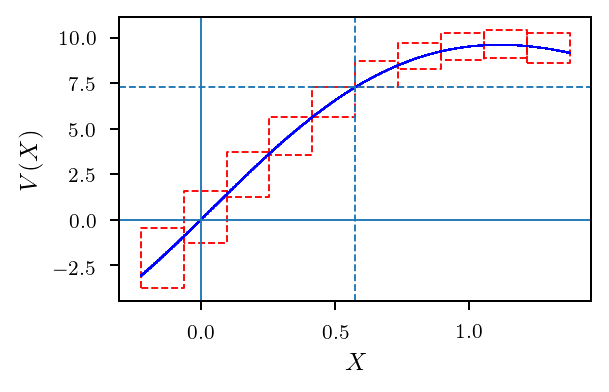

Figure: Rigorous covering of the universal eigenfunction, $v$


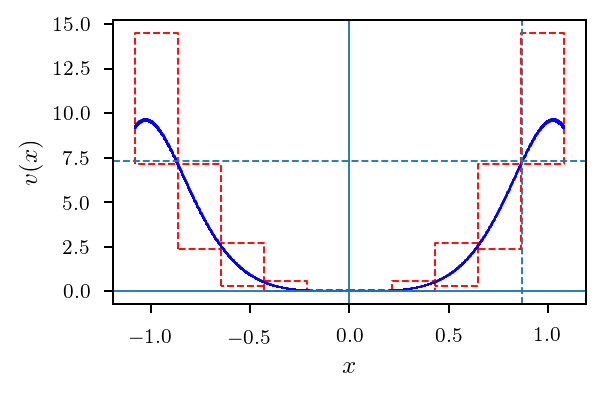

In [58]:
from rigorous.covering import cover_circle, rectangles_coords
from rigorous.covering import cover_interval, cover_graph

# universal function in the conventional coordinates
def v0_rho(x):
    X = Q(x)
    return V0_rho(X)

# safety margin to stay safely within the domain
safety = RR(1e-3)
c, r = RR(Omega.c), RR(Omega.r)

if make_figures:
    # plot rigorous coverings
    init_plotting(plt)
    plt.figure(figsize=set_size('prl'))
    plt.plot(*rectangles_coords(cover_graph(V0_rho, c-r+safety, c+r-safety, 10)), color='r', linestyle='--')
    plt.plot(*rectangles_coords(cover_graph(V0_rho, c-r+safety, c+r-safety, 1000)), color='b')
    plt.axhline(0)
    plt.axvline(0)
    Qinvc = c**(1/RR(d))
    plt.axvline(c, linestyle='--')
    plt.axhline(V0_rho(Interval(c)).lo, linestyle='--')
    plt.xlabel('$X$')
    plt.ylabel('$V(X)$')
    plt.title('Rigorous covering of the even representation, $V$')
    savefig(plt, 'fig/feig_V_small.pdf')
    plt.show()

    X_range = Interval(max(0.0, c-r), max(0, c+r))
    x_range = X_range**0.25
    plt.figure(figsize=set_size('prl'))
    plt.plot(*rectangles_coords(cover_graph(v0_rho, -x_range.hi+safety, x_range.hi-safety, 10)), color='r', linestyle='--')
    plt.plot(*rectangles_coords(cover_graph(v0_rho, -x_range.hi+safety, x_range.hi-safety, 1000)), color='b')
    plt.axhline(0)
    plt.axvline(0)
    plt.axvline(Qinvc, linestyle='--')
    plt.axhline(v0_rho(Interval(Qinvc)).lo, linestyle='--')
    plt.xlabel('$x$')
    plt.ylabel('$v(x)$')
    plt.title('Rigorous covering of the universal eigenfunction, $v$')
    savefig(plt, 'fig/feig_v_small.pdf')
    plt.show()

To aid in interpreting the vertical scale of the above plots, recall that we have proved that the function ball $B(V^0,\hat\rho)$ contains the relevant eigenfunction $V$ that, with our chosen normalisation, has constant term $V_0=\phi(V)=\delta$, Feigenbaum's delta.  Since the coefficients of $V$ are defined with respect to the basis determined by the domain $\Omega=D(c,r)$, then a consequence is that, for our chosen normalisation, we have $V(c)=\delta$ (indicated by the dashed lines in the plots).

In order to compute a rigorous covering of the eigenfunction over much larger subintervals of the real line, in particular those extending much out of the domain $\Omega$, we may use function ball operations (evaluations) to implement the following expression (together with the fixed-point equation for $G$) recursively:

\begin{align}
V(X)
&= \delta^{-1}DT(G)V(X)\\
&= \delta^{-1}\bigl[-a^{-2}\delta \cdot G(Q(G(a^dX)))\nonumber\\
&\quad{}+ a^{-1}\cdot V(Q(G(a^dX)))\nonumber\\
&\qquad{}+ a^{-1}\cdot G'(Q(G(a^dX)))\cdot 2G(a^dX)\cdot V(a^dX)\nonumber\\
&\qquad\quad{}+ a^{-1}\cdot G'(Q(G(a^dX)))\cdot Q'(G(a^dX))\cdot G'(a^dX)\cdot Q'(a)\delta\cdot X\bigr],
\end{align}
where $a:=G(1)$ and $\delta:=\phi(V)$.

In order to use the above expression, notice that we also require bounds on the derivative $G'(X)$.

#### Derivatives of function balls

Recall that we have a function ball $F_1$ with $G\in F_1$.  We now want to find a function ball $F_1'$ such that $G'\in F_1'$.

Unfortunately, it is not possible to bound $G'$ directly.  The corresponding derivative operator is unbounded.  To see why, consider a function ball of the form
$$
B = \mathcal{A}([0,0],[0,0],\ldots,[0,0];1;0).
$$
For a given truncation degree $N$, this ball contains, for example, the functions
$$
q(x) = x^{2N},\quad\mbox{and}\quad p(x) = x^{3N},
$$
whose derivatives are given by
$$
q'(x) = 2Nx^{2N-1},\quad\mbox{and}\quad p'(x) = 3Nx^{3N-1},
$$
with $\ell_1$-norms $\|q'\|_1=2N$ and $\|p'\|_1=3N$, respectively.  This example should be enough to illustrate that the image of the original function ball $B\ni q,p$ under the relevant derivative operator is not bounded and thus the *derivative of a function ball* cannot in general be bounded using another function ball in our formulation.

However, the operation of *differentiation followed by composition* $G'\circ H$ can be bounded for suitable functions, $H$, namely those with $\|\psi_\Omega\circ H\|_1<1$.  This is because (1) composition $A\circ B$ is well-defined for $A,B\in\mathcal{A}$ when $\|B\|_1<1$ and, (2) since $G=\hat{G}\circ\psi_\Omega$ for a suitable $\hat{G}\in\mathcal{A}$, we have
$$
G'=\hat{G}'\circ\psi_\Omega\cdot\psi_\Omega'=\hat{G}'\circ\psi_\Omega\cdot\frac{1}{r},
$$
(see, for example, EKW), and finally (3) the expression $Nx^{N-1}$ attains a maximum at finite $N$ for $0<x<1$.

#### Function ball containing the derivative of $G$

We can use the fixed-point equation for $G$:
\begin{equation}
G(X) = a^{-1}G(Q(G(a^dX))).
\end{equation}
Differentiating gives
\begin{equation}
G'(X) = a^{-1}G'(Q(G(a^dX)))\cdot Q'(G(a^dX))\cdot G'(a^dX)\cdot a^d.
\end{equation}
Although we cannot bound the left-hand side $G'$ directly, we can bound every subexpression on the right-hand side, in particular notice that $G'$ only occurs on the right-hand side as a composition $G'\circ H$ with various maps $H$.  Further, from the propery of Domain Extension, established for our chosen domains during the existence proof, the $\ell_1$-norms of all of the relevant maps $\psi_\Omega\circ H$ are less than unity.  Using the above expression (together with the fixed-point equation for $G$) recursively allows us to bound $G'$ over larger intervals extending outside $\Omega$.

In [59]:
G = F1
X = G.identity()
a = G(Interval(1))
alpha = Interval(1)/a

Xad = X*a**d
GXad = G(Xad)
QGXad = Q(GXad)
GQGXad = G(QGXad)

TG = alphaGQGXad = GQGXad*alpha

In [60]:
# bound the derivative of G on X
# we cannot gain useful bounds using G alone
# we can use derivative and composition with a suitable map
# we use the derivative of the RHS of the fixed-point eqn
dG = G.diff_compose
dQ = Qdash

U = dG(QGXad)
V = dQ(GXad)
W = dG(Xad)*a**d

G_prime = U*V*W*alpha

In [61]:
# this needs to be scaled
# using the expression for the Frechet derivative
# of T at G.

def Gdash_full(X):
    if abs((X-c)/r) <= 1:
        return G_prime(X)
    else:
        G = F1
        a = G(Interval(1))
        alpha = Interval(1)/a
        Xad = X*a**d
        GXad = G_full(Xad)
        QGXad = Q(GXad)
        GQGXad = G_full(QGXad)
        return Gdash_full(QGXad)*Qdash(GXad)*Gdash_full(Xad)*a**(d-1)

Figure: Rigorous covering of the even representation, $G'$


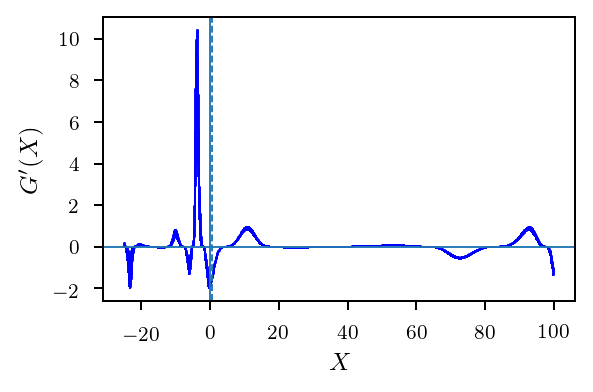

In [62]:
if make_figures:
    init_plotting(plt)
    plt.figure(figsize=set_size('prl'))
    plt.plot(*rectangles_coords(cover_graph(Gdash_full, -25, 100, 1000)), color='b')
    plt.axhline(0)
    plt.axvline(0)
    plt.axvline(c, linestyle='--')
    plt.xlabel('$X$')
    plt.ylabel("$G'(X)$")
    plt.title("Rigorous covering of the even representation, $G'$")
    savefig(plt, 'fig/feig_Gdash_large.pdf')
    plt.show()

#### Rigorous coverings of the eigenfunction on larger intervals

Finally, combining the fixed-point equation for $G$, the recurrence for $G'$, and the recurrence for $V$, allows us to bound the eigenfunction $V(X)$ itself, and hence $v(x)=V(Q(x))$, the corresponding eigenfunction for the derivative of the original renormalisation operator (rather than our even representation), over larger subintervals of the real line.

In [92]:
def V_full(X):
    if abs((X-c)/r) <= Interval(1):
        return V0_rho(X)
    else:
        G = F1
        a = G(Interval(1))
        alpha = Interval(1)/a
        delta = phi(V0_rho)
        
        Xad = X*a**d
        GXad = G_full(Xad)
        QGXad = Q(GXad)
        GQGXad = G_full(QGXad)

        GdXad = Gdash_full(Xad)
        GdQGXad = Gdash_full(QGXad)      
        
        DTGV_0 = -alpha**2*V0_rho(1)*GQGXad
        DTGV_1 = alpha*V_full(QGXad)
        DTGV_2 = alpha*GdQGXad*Qdash(GXad)*V_full(Xad)
        DTGV_3 = alpha*GdQGXad*Qdash(GXad)*GdXad*Qdash(a)*V0_rho(1)*X
        
        return (DTGV_0+DTGV_1+DTGV_2+DTGV_3)*(Interval(1)/delta)

Figure: Rigorous covering of the even representation, $V$


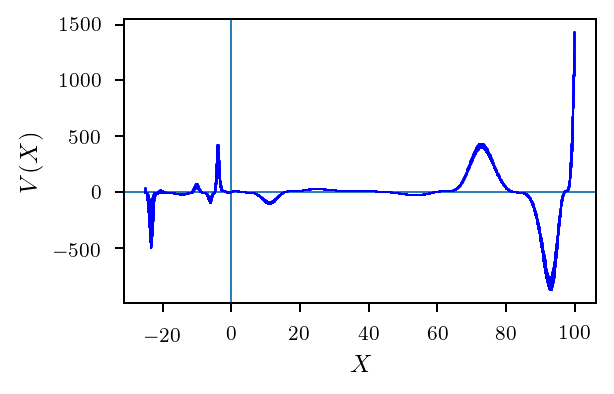

In [93]:
if make_figures:
    init_plotting(plt)
    plt.figure(figsize=set_size('prl'))
    plt.axhline(0)
    plt.axvline(0)
    plt.plot(*rectangles_coords(cover_graph(V_full, -25, 100, 1000)), color='b')
    plt.xlabel('$X$')
    plt.ylabel("$V(X)$")
    plt.title("Rigorous covering of the even representation, $V$")
    savefig(plt, 'fig/feig_V_large.pdf')
    plt.show()

In [94]:
def v_full(x):
    X = Q(x)
    return V_full(X)

Figure: Rigorous covering of the universal eigenfunction, $v$


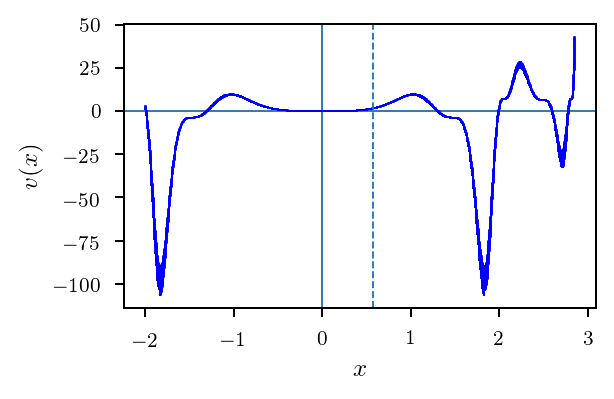

In [97]:
if make_figures:
    xy1 = rectangles_coords(cover_graph(v_full, -2, 2.85, 1000))

    plt.figure(figsize=set_size('prl'))
    plt.axhline(0)
    plt.axvline(0)
    plt.plot(*xy1, color='b')
    plt.axvline(c, linestyle='--')
    plt.xlabel('$x$')
    plt.ylabel('$v(x)$')
    plt.title('Rigorous covering of the universal eigenfunction, $v$')
    savefig(plt, 'fig/feig_v_large.pdf')
    plt.show()

The above results could be improved by working to higher truncation degree, computing a tighter ball $F_1$ around the fixed point $G$, which would allow us to work with a better approximate eigenvalue $V^0$ and a smaller ball around it.

## The effect of noise

Following [cite] we consider the universality observed in the period-doubling of unimodal maps with noise, exemplified by iteration of the family of maps
$$
x_{n} \mapsto 1-\lambda x_n^2+\kappa\xi_n,
$$
in which the $\xi_n$ are i.i.d. random variables with expected value zero and a fixed variance $\sigma^2$.

Following Crutchfield et al. [cite 1981] and Shraiman et al. [cite], a renormalisation group analysis leads to the eigenproblem
$$
\gamma^2\theta(a^{-1}x) = a^{-2}\left[(g'(g(x)))^2\theta(x)+\theta(g(x))\right].
$$

### Deriving the noise eigenproblem

Specifically, iterate the map

\begin{align}
x_{n+1} &= g_0(x_n) + \kappa U_0(x_n)\xi_n,\\
g_0(x) &= 1-\lambda_\infty x^2,\\
U_0(x) &\equiv 1,
\end{align}

where $\lambda_\infty$ denotes the critical value of the parameter $\lambda$ that puts the logistic family at the limit of its first period-doubling cascade.  To first order in the parameter $\kappa$, we obtain

\begin{align}
x_{n+2}
&= g_0(g_0(x_n))\nonumber\\
&\quad{}+ \kappa\left[g_0'(g_0(x_n))U_0(x_n)\xi_n
+ U_0(g_0(x_n))\xi_{n+1}\right].
\end{align}

Define $U_1(x)$ to be a scaling that normalises the expression in the square brackets to preserve the variance in the sense that putting

$$
\left[g_0'(g_0(x_n))U_0(x_n)\xi_n
+ U_0(g_0(x_n))\xi_{n+1}\right] =: U_1(x)x_n',
$$

gives $\mathrm{var}(x_n')=\sigma^2$.
Taking the variance (noting the independence of the $\xi_k$) gives

$$
\mathbb{E}(U_1^2)
=a^{-2}\left[(g_0'(g_0(x)))^2U_0^2(x)+U_0^2(g_0(x))\right].
$$

Repeating this, we obtain the recurrence

$$
x_{n+2} = g_{k+1}(x_n) + \kappa U_{k+1}(x_n)\xi_n,
$$

which has the same functional form as the original iteration, but with

\begin{align}
g_{k+1}(x)
&= a^{-1}g_k(g_k(ax)),\\
U_{k+1}(x)
&= \sqrt{a^{-2}\left[(g_k'(g_k(x)))^2U_k^2(x)
+ U_k^2(g_k(x))\right]}.
\end{align}

Iterating this renormalisation operation gives $g_k\to g$, the Feigenbaum fixed point, for which

$$
g(x) = a^{-1}g(g(ax)).
$$

Thus, for $k\to\infty$,

$$
U_{k+1}(x)
\to \sqrt{a^{-2}\left[(g'(g(x)))^2U_k^2(x)
+ U_k^2(g(x))\right]}.
$$

Making the ansatz

$$
U_k(x) = \gamma^k\sqrt{\varphi(x)},
$$

then leads to the eigenproblem stated earlier,

$$
\gamma^2\theta(a^{-1}x) = a^{-2}\left[(g'(g(x)))^2\theta(x)+\theta(g(x))\right].
$$

### Noise eigenproblem in the even representation

Writing $\theta = K\circ Q$, we consider the following nonlinear eigenproblem
$$
\gamma^2K
= \mathscr{L}K,
$$
where we define $\gamma=\phi(K)$ and
\begin{align}
\mathscr{L}K
&=
a^{-2}\biggl[
\bigl(G'(Q(G(a^dX)))\cdot Q'(G(a^dX))\bigr)^2K(a^dX)\nonumber\\
&\quad{}+ K(Q(G(a^dX)))
\biggr],
\end{align}
this leads to the following operator, which differs in explicit functional form from the one implied by the above derivation

$$
\mathscr{F}(K)
=
\mathscr{L}K - \phi(K)^2K.
$$

Again, we may bound the function $K$ rigorously by performing Newton's method numerically to find a good approximate fixed point $K^0$ on a suitable domain, and then establishing that a corresponding modified Newton operator is a contraction mapping on a ball around $K^0$.

In [67]:
c, r, coeffs = import_poly_with_domain('dat/' + prefix + '_K0.dat')
assert Domain(c, r) == F1.dom

K0_coeffs = list(map(Interval, coeffs))
K0_trunc = Trunc(trunc_degree, K0_coeffs)
K0_ball = Ball(K0_trunc, 0, 0)
K0 = Function(F1.dom, K0_ball)

In [68]:
def make_L_noise(F1):
    G = F1
    a = G(1)
    X = G.identity()

    Xad = X*a**d
    GXad = G(Xad)
    QGXad = Q(GXad)
    GQGXad = G(QGXad)

    Gdash = G.diff_compose
    GdashXad = Gdash(Xad)
    GdashQGXad = Gdash(QGXad)
    GdashQGXaddQGXad2 = (GdashQGXad*Qdash(GXad))**2
    
    def L_noise(K):
        return (K(QGXad) + GdashQGXaddQGXad2*K(Xad))*a**-2
    return L_noise

L_noise = make_L_noise(F1)

def F_noise(K,
            L_noise=L_noise,
            phi=phi):
    return L_noise(K) - K*phi(K)**2

def DF_noise(K, dK,
             L_noise=L_noise,
             phi=phi):
    return L_noise(dK) - (K*2*phi(K)*phi(dK) + dK*phi(K)**2)

The Frechet derivative of $\mathscr{F}(K)$ is given by

\begin{align}
D\mathscr{F}(K)\delta K
=
\mathscr{L}\delta K
- 2\phi(K)\phi(\delta K)K
- \phi(K)^2\delta K.
\end{align}

The modified Newton operator is given by

\begin{align}
\Psi(K)
&= K - \Lambda\mathscr{F}(K),
\end{align}

where $\Lambda$ is a fixed linear operator approximating $[D\mathscr{F}(K)]^{-1}$.

We will then have

\begin{align}
&D\Psi(K)\delta K\nonumber\\
&= \delta K - \Lambda D\mathscr{F}(K)\delta K\\
&= \delta K - \Lambda\bigl[
\mathscr{L}\delta K
- 2\phi(K)\phi(\delta K)K
- \phi(K)^2\delta K.
\bigr].
\end{align}

We take
\begin{align}
D\mathscr{F}(K)
&\simeq \mathscr{L}-2\phi(K^0)K^0e_0^{*}-\phi(K^0)^2I,
\end{align}
and then let $\Lambda$ be an approximation to the inverse of the right-hand side, where $K^0$ is chosen such that $K^0_H=0$.

The (fixed) linear operator $\Lambda$ that results has the following action on high-order terms

\begin{align}
\Lambda\delta K_H
&= \Lambda_{HH}\delta K_H\\
\Lambda_{HH}
&:= -\frac{1}{\phi(K^0)^2}I.
\end{align}

In [69]:
# matrix used to construct the linear operator in the approximate newton method
Lambda_noise_elts = import_matrix('dat/' + prefix + '_lambda_noise.dat')
Lambda_noise_elts = [row[:trunc_degree+1] for row in Lambda_noise_elts[:trunc_degree+1]]
assert len(Lambda_noise_elts) == len(Lambda_noise_elts[0]) == trunc_degree+1

# construct the real interval matrix
Lambda_noise_PP = RMatrix(Lambda_noise_elts)

# compute the high-order action of the operator
Lambda_noise_HH = -Interval(1)/phi(K0)**2

# apply the newton method and see how far F0 moves; defines epsilon for the proof
def Phi_noise(K):
    return K - Lambda_noise_PP(F_noise(K),
                               high_order_coeff=Lambda_noise_HH)

def DPhi_noise(K, dK):
    return dK - Lambda_noise_PP(DF_noise(K, dK),
                                high_order_coeff=Lambda_noise_HH)

In [70]:
eps_noise = abs(Phi_noise(K0)-K0)
print(f'eps_noise\n= ||Phi_noise(K^0)-K^0||_1\n= {eps_noise}')

eps_noise
= ||Phi_noise(K^0)-K^0||_1
= [+0.00000000000000E+00, +2.33678882043686E-16]


In [71]:
#rho_noise = RR('1E-5') #chosen at top of notebook
print(f'rho_noise\n= {rho_noise}')
assert rho_noise > eps_noise

rho_noise
= 1E-15


In [72]:
K0_rho = K0 + K0.general_ball(rho_noise)
print(f'B(K^0, rho_noise)\n= {K0_rho}')

B(K^0, rho_noise)
= Function Ball: c=0.5754, r=0.8, N=40 (15 sf shown)
000: [+8.24391085425258E+0, +8.24391085425259E+0]
001: [-6.03226928484236E+0, -6.03226928484235E+0]
002: [-9.98201839348877E-1, -9.98201839348876E-1]
003: [+2.63638003557548E+0, +2.63638003557549E+0]
004: [-8.14179619821450E-1, -8.14179619821449E-1]
005: [-2.91477669697415E-1, -2.91477669697414E-1]
006: [+2.74537207055011E-1, +2.74537207055012E-1]
007: [-4.63312571430640E-2, -4.63312571430639E-2]
008: [-3.00177043418710E-2, -3.00177043418709E-2]
009: [+1.74740610815969E-2, +1.74740610815970E-2]
010: [-1.24484001648334E-3, -1.24484001648333E-3]
011: [-2.11004672857074E-3, -2.11004672857073E-3]
012: [+8.33345817213018E-4, +8.33345817213019E-4]
013: [+2.86367958847238E-5, +2.86367958847239E-5]
014: [-1.18931881832365E-4, -1.18931881832364E-4]
015: [+3.21647135914723E-5, +3.21647135914724E-5]
016: [+5.53339073414234E-6, +5.53339073414235E-6]
017: [-5.69230219120874E-6, -5.69230219120873E-6]
018: [+1.00723785799458E-6, +

Anticipating the dependency problem, we compute
$\|D\Psi(B(K^0, \rho_\mathrm{noise}))E_H\|_1$ using the naiive expression given above:

In [73]:
k = trunc_degree+1
E_k = K0.basis_element(k)
print(k, abs(DPhi_noise(K0_rho, E_k)))

41 [+0.00000000000000E+00, +2.00067251255341E+0]


We mitigate the dependency problem in this case by using
\begin{align}
D\Psi(K)\delta K_H
&= \left[1-\left(\frac{\phi(K)}{\phi(K^0)}\right)^2\right]\delta K_H
-\Lambda\mathscr{L}\delta K_H.
\end{align}

In [74]:
def bound_DPhi_noise(k,
                     phi=phi,
                     K0=K0,
                     K0_rho=K0_rho,
                     V0=V0,
                     V0_rho=V0_rho,
                     L_noise=L_noise,
                     DF_noise=DF_noise,
                     Lambda_noise_PP=Lambda_noise_PP,
                     Lambda_noise_HH=Lambda_noise_HH,
                     dependency=True):

    E_k = K0.basis_element(k)
    L_k = L_noise(E_k)
    deltaF_k = DF_noise(K0_rho, E_k)
    if k > trunc_degree and dependency:
        DPsi_k = (E_k*(Interval(1)-(phi(V0_rho)/phi(V0))**2) - Lambda_noise_PP(L_k, high_order_coeff=Lambda_noise_HH))
    else:
        DPsi_k = E_k - Lambda_noise_PP(deltaF_k, high_order_coeff=Lambda_noise_HH)

    # report on the cruicial norms
    norm_deltaF_k = abs(deltaF_k)
    norm_DPsi_k = abs(DPsi_k)

    # return the quantities and their norms
    return deltaF_k, norm_deltaF_k, DPsi_k, norm_DPsi_k

In [75]:
%%time

# run the function in parallel using multiprocessing
# we note that the decimal library is process-safe;
# each process gets its own context.

k_vals = list(range(trunc_degree+2))
if parallel:
    import pathos.multiprocessing
    from pathos.multiprocessing import ProcessingPool as Pool
    num_processors = pathos.multiprocessing.cpu_count()
    with Pool(num_processors) as pool:
        ans = list(zip(*pool.map(bound_DPhi_noise, k_vals)))
else:
    ans = list(zip(*map(bound_DPhi_noise, k_vals)))

CPU times: user 1.4 s, sys: 4.07 ms, total: 1.4 s
Wall time: 12 s


In [76]:
deltaF_ks, norm_deltaF_ks, DPsi_ks, norm_DPsi_ks = ans

Bounds computed on the $\|D\Psi(K)e_k\|_1$, using the modified expression for the high-order bound, are then as follows:

In [77]:
for k, norm_DPsi_k in enumerate(norm_DPsi_ks):
    print(f'{k:03d}: {norm_DPsi_k}')

000: [+0.00000000000000E+00, +1.12667768246143E-14]
001: [+0.00000000000000E+00, +4.40417042823963E-16]
002: [+0.00000000000000E+00, +4.35034146599447E-16]
003: [+0.00000000000000E+00, +3.75573199569834E-16]
004: [+0.00000000000000E+00, +3.45584699788559E-16]
005: [+0.00000000000000E+00, +3.27366341922487E-16]
006: [+0.00000000000000E+00, +3.16841778131417E-16]
007: [+0.00000000000000E+00, +2.98811029842399E-16]
008: [+0.00000000000000E+00, +2.86442972669459E-16]
009: [+0.00000000000000E+00, +2.75176789027006E-16]
010: [+0.00000000000000E+00, +2.67170869539023E-16]
011: [+0.00000000000000E+00, +2.60689031756123E-16]
012: [+0.00000000000000E+00, +2.56250893492122E-16]
013: [+0.00000000000000E+00, +2.52878608551290E-16]
014: [+0.00000000000000E+00, +2.50603801722212E-16]
015: [+0.00000000000000E+00, +2.50790081665735E-16]
016: [+0.00000000000000E+00, +5.92046337176461E-16]
017: [+0.00000000000000E+00, +4.23095465831788E-15]
018: [+0.00000000000000E+00, +1.77009190438669E-13]
019: [+0.000

The resulting bound $\|D\Psi(K)e_k\|_1\le\kappa_\mathrm{noise}$ for all $K\in B(K^0,\rho_\mathrm{noise})$ and $k\ge 0$ is given by

In [78]:
kap_noise = Interval.hull(norm_DPsi_ks)
print(f'kap_noise\n= {kap_noise}')

kap_noise
= [+0.00000000000000E+00, +6.72512553404319E-4]


In [79]:
print(f'epsilon_noise < rho_noise(1-kappa_noise)')
print(f' <=> {eps_noise}')
print(f'   < {rho_noise*(1-kap_noise)}')
print(f' <=> {eps_noise < rho_noise*(1-kap_noise)}')

epsilon_noise < rho_noise(1-kappa_noise)
 <=> [+0.00000000000000E+00, +2.33678882043686E-16]
   < [+9.99327487446595E-16, +1.00000000000000E-15]
 <=> True


In [80]:
assert eps_noise < rho_noise*(Interval(1)-kap_noise)

### Bounding the noise eigenfunction on larger intervals

Finally, combining the fixed-point equation for $G$, the recurrence for $G'$, and the recurrence for $K$ shown here
\begin{align}
K(X)
&= \phi(K)^{-2}\mathscr{L}K(X)\\
&= \phi(K)^{-2}\bigl[a^{-2} K(Q(G(a^dX)))\nonumber\\
&\quad{}+ a^{-2} [G'(Q(G(a^dX)))\cdot Q'(G(a^dX))]^2\cdot K(a^dX)\bigr],
\end{align}
where $a:=G(1)$ and $\gamma=\phi(K):=K_0$ (coefficient), allows us to gain rigorous bounds on the eigenfunction $K(X)$ itself, and hence $\theta(x)=K(x^d)$ over larger subintervals of the real line.

In [81]:
V_noise = K0_rho

def V_noise_full(X):
    if abs(X-c) <= r:
        return V_noise(X)
    else:
        a = G(1)
        adX = a**d*X
        GadX = G_full(adX)
        QGadX = Q(GadX)
        GQGadX = G_full(QGadX)
    
        GdashadX = Gdash_full(adX)
        GdashQGadX = Gdash_full(QGadX)

        term2 = (a**-1)**2*V_noise_full(QGadX)
        term3 = (a**-1*GdashQGadX*Qdash(GadX))**2*V_noise_full(adX)
        lhs = term2 + term3
        
        # don't forget to divide by the square of the eigenvalue;
        return lhs/phi(V_noise)**2
    
def v_noise_full(x):
    return V_noise_full(Q(x))

Figure: Rigorous covering of noise eigenfunction, $\theta$


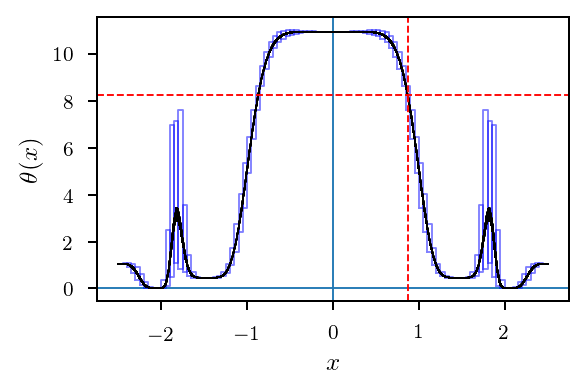

In [82]:
if make_figures:
    xy1 = rectangles_coords(cover_graph(v_noise_full, -2.5, 2.5, 100))
    xy2 = rectangles_coords(cover_graph(v_noise_full, -2.5, 2.5, 2000))

    plt.figure(figsize=set_size('prl'))
    plt.axhline(0)
    plt.axvline(0)
    plt.plot(*xy1, color='b', alpha=0.5)
    plt.plot(*xy2, color='k')
    plt.axvline(c**(1/RR(d)), linestyle='--', color='r')
    plt.axhline(v_noise_full(c**(1/RR(d))).hi, linestyle='--', color='r')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\theta(x)$')
    plt.title(r'Rigorous covering of noise eigenfunction, $\theta$')
    savefig(plt, 'fig/feig_k_large1.pdf')
    plt.show()

The bound that we gain on the eigenvalue is given by $\gamma=\phi(K)$:

In [83]:
print(phi(V_noise))

[+8.24391085425258E+0, +8.24391085425259E+0]


In [84]:
print(V_noise(c))

[+8.24391085425258E+0, +8.24391085425259E+0]


Figure: Rigorous coverings of noise eigenfunction


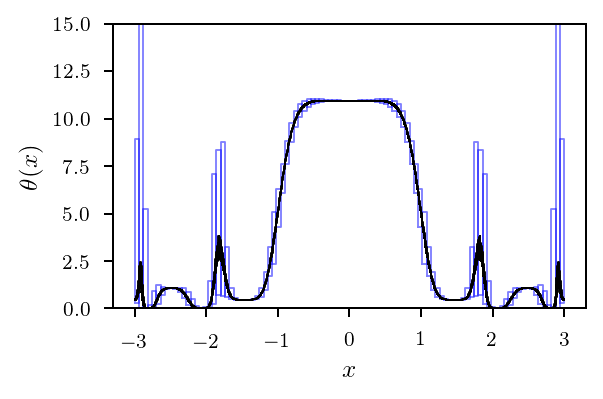

In [86]:
if make_figures:
    xy1 = rectangles_coords(cover_graph(v_noise_full, -3, 3, 100))
    xy2 = rectangles_coords(cover_graph(v_noise_full, -3, 3, 1000))
    
    plt.figure(figsize=set_size('prl'))
    plt.axhline(0)
    plt.plot(*xy1, color='b', alpha=0.5)
    plt.plot(*xy2, color='k')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\theta(x)$')
    plt.title(r'Rigorous coverings of noise eigenfunction')
    savefig(plt, 'fig/feig_k_large2.pdf')
    plt.ylim(0, 15)
    plt.show()

### Rigorous bounds on constants

In [87]:
values = trunc_degree, trunc_degree*d, prec, rho, rho_hat, rho_noise
names = 'N', 'dN', 'prec', 'rho', 'rho_hat', 'rho_noise'
params = dict(zip(names, values))

for name, value in params.items():
    print(f'{name} = {value}')

N = 40
dN = 160
prec = 40
rho = 1E-20
rho_hat = 1E-15
rho_noise = 1E-15


In [88]:
def all_digits(x):
    return f'[{x.lo:+E},\n {x.hi:+E}]'

In [89]:
values = F1(1), Interval(1)/F1(1), phi(V1), phi(K0_rho)
names = 'a', 'alpha', 'delta', 'gamma'
constants = dict(zip(names, values))

for name, x in constants.items():
    print(f'{name}\n{all_digits(x)}')

a
[-5.916099166344381501496243579964057537199E-1,
 -5.916099166344381501296243579964057537192E-1]
alpha
[-1.690302971405244853372351381347709310006E+0,
 -1.690302971405244853315208898644881309997E+0]
delta
[+7.284686217073343329620517875715518284184E+0,
 +7.284686217073343398997339667326053475956E+0]
gamma
[+8.243910854252585818398468140727485681598E+0,
 +8.243910854252587818398468140727485681598E+0]


In [90]:
for name, x in constants.items():
    print(f'{name}\n{all_digits(quantize(x))}')

a
[-5.916099166344381502E-1,
 -5.916099166344381501E-1]
alpha
[-1.6903029714052448534E+0,
 -1.6903029714052448533E+0]
delta
[+7.2846862170733433E+0,
 +7.2846862170733434E+0]
gamma
[+8.24391085425258E+0,
 +8.24391085425259E+0]


## Technical aspects

The underlying numerical computations were performed using number systems for decimal [Python version] and binary [Julia version] computation, with correctly implemented rigorous directed rounding modes and multiple-precision, that conform to the relevant subsets of the ANSI-X3.274-1996 and the IEEE-754-2008 standards, respectively.

The rigorous computational framework for function spaces is verified with the aid of over 1200 unit tests.

## Acknowledgements

We thank Andreas Stirnemann and Ben Mestel for their invaluable advice.  The Jupyter Notebook with a Python 3 kernel [Python version] and a Julia 1.3.1 kernel [Julia version] was used as a literate programming environment for developing the main calculations presented in the note.

## Report on packages used

In [91]:
import sys
import decimal
import pathos

print(f'python=={sys.version}')
print(f'decimal=={decimal.__version__}')
print(f'pathos=={pathos.__version__}')

import matplotlib
import numpy

print(f'numpy=={np.__version__}')
print(f'matplotlib=={matplotlib.__version__}')

python==3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
decimal==1.70
pathos==0.2.3
numpy==1.18.1
matplotlib==3.1.3
